In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column
from bokeh.io import output_notebook, show, save
from bokeh.models import CategoricalColorMapper
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource, Range1d, FactorRange
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6, Spectral10, Spectral4
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import cumsum
from math import pi
from bokeh.palettes import Category20c
import plotly.graph_objects as go
import plotly.express as px
import warnings
from bokeh.models.glyphs import Text
from bokeh.transform import dodge
import plotly.express as px
import pandas as pd
import numpy as np
import statsmodels.api as sm
import plotly.graph_objs as go
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error
import sklearn
# from autosklearn.regression import AutoSklearnRegressor
# from autosklearn.metrics import mean_absolute_error as auto_mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import shap
import pickle


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
raw_data=pd.read_csv('/content/drive/MyDrive/main.csv')


In [5]:
raw_data

,Morning Alertness,se_pcen,spt_pcen,sleepoffset_hr_pcen,L5VALUE,L5TIME_num,M10VALUE_daybefore,M10TIME_num_daybefore,meal_type_breakfast,meal_log_iauc_breakfast,meal_offset_to_breakfast_hr,age,sex,bmi,zygosity,sunrise_hr,dst,weekend,family_id,username
0,47.250000,0.001543,0.926686,0.955952,2.721177,0.668056,48.365305,7.834722,MCB,0.777249,-0.209444,53.645448,F,25.530409,MZ,7.800000,False,False,predict1009,predict10091
1,51.750000,0.034187,0.089186,-0.327381,2.175187,2.668056,17.615711,9.334722,OGTT,1.012362,1.586944,53.645448,F,25.530409,MZ,7.733333,False,False,predict1009,predict10091
2,59.000000,-0.023392,1.571131,1.355952,2.304887,4.668056,56.711167,10.001389,High Fibre,0.774941,0.625833,53.645448,F,25.530409,MZ,7.583333,False,True,predict1009,predict10091
3,50.000000,0.003077,0.091072,-0.458333,5.013151,0.334722,54.159403,7.168056,MCB,0.864187,2.024722,53.645448,F,24.272560,MZ,7.800000,False,False,predict1009,predict10092
4,53.800000,0.036777,-0.175595,0.058333,4.030731,2.668056,48.373843,10.168056,High Carb,1.248574,2.816667,53.645448,F,24.272560,MZ,7.783333,False,True,predict1009,predict10092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,67.333333,0.022414,-1.448016,-1.704762,3.529514,1.834722,38.509619,9.334722,High Carb,1.688164,0.947222,55.822040,F,26.113602,MZ,7.000000,True,False,predict999,predict9991
6740,69.666667,0.017670,1.029762,0.778571,3.794901,5.168056,47.939220,12.501389,UK Average,1.493164,0.111111,55.822040,F,26.113602,MZ,7.083333,True,False,predict999,predict9991
6741,66.000000,-0.028763,-0.141071,-0.371429,2.229535,3.501389,24.526739,10.334722,OGTT,1.896814,0.264167,55.822040,F,26.113602,MZ,7.116667,True,False,predict999,predict9991
6742,72.666667,-0.033837,-0.886905,0.311905,3.391674,2.168056,40.709453,11.001389,High Fibre,1.604433,-1.285833,55.822040,F,26.113602,MZ,7.133333,True,True,predict999,predict9991


In [7]:
raw_data.shape

(6744, 20)

In [8]:
raw_data.isna().sum()

,0
Morning Alertness,0
se_pcen,0
spt_pcen,0
sleepoffset_hr_pcen,0
L5VALUE,0
L5TIME_num,0
M10VALUE_daybefore,0
M10TIME_num_daybefore,0
meal_type_breakfast,0
meal_log_iauc_breakfast,0


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6744 entries, 0 to 6743
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Morning Alertness            6744 non-null   float64
 1   se_pcen                      6744 non-null   float64
 2   spt_pcen                     6744 non-null   float64
 3   sleepoffset_hr_pcen          6744 non-null   float64
 4   L5VALUE                      6744 non-null   float64
 5   L5TIME_num                   6744 non-null   float64
 6   M10VALUE_daybefore           6744 non-null   float64
 7   M10TIME_num_daybefore        6744 non-null   float64
 8   meal_type_breakfast          6744 non-null   object 
 9   meal_log_iauc_breakfast      6744 non-null   float64
 10  meal_offset_to_breakfast_hr  6744 non-null   float64
 11  age                          6744 non-null   float64
 12  sex                          6744 non-null   object 
 13  bmi               

In [10]:
raw_data['dst'] = raw_data['dst'].astype('object')
raw_data['weekend'] = raw_data['weekend'].astype('object')

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6744 entries, 0 to 6743
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Morning Alertness            6744 non-null   float64
 1   se_pcen                      6744 non-null   float64
 2   spt_pcen                     6744 non-null   float64
 3   sleepoffset_hr_pcen          6744 non-null   float64
 4   L5VALUE                      6744 non-null   float64
 5   L5TIME_num                   6744 non-null   float64
 6   M10VALUE_daybefore           6744 non-null   float64
 7   M10TIME_num_daybefore        6744 non-null   float64
 8   meal_type_breakfast          6744 non-null   object 
 9   meal_log_iauc_breakfast      6744 non-null   float64
 10  meal_offset_to_breakfast_hr  6744 non-null   float64
 11  age                          6744 non-null   float64
 12  sex                          6744 non-null   object 
 13  bmi               

In [12]:
# brifly decribe the data
#some attributes skewed to the right(mean>median) some to the left(mean<median)
raw_data.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
Morning Alertness,6744.000000,61.786398,18.679405,0.000000,49.500000,62.000000,74.666667,100.000000
se_pcen,6744.000000,0.000800,0.040668,-0.276249,-0.021463,0.004608,0.027409,0.168484
spt_pcen,6744.000000,-0.136648,1.198498,-5.702030,-0.803522,-0.141750,0.562527,6.000000
sleepoffset_hr_pcen,6744.000000,-0.108816,1.041777,-6.843939,-0.665476,-0.161126,0.437933,3.966667
L5VALUE,6744.000000,4.336052,2.706116,0.067866,2.753845,3.711616,5.073168,37.117257
L5TIME_num,6744.000000,1.081803,1.484032,-11.998611,0.168056,0.834722,1.834722,11.168056
M10VALUE_daybefore,6744.000000,42.488721,20.685664,8.768075,30.746361,38.387518,48.731571,582.622116
M10TIME_num_daybefore,6744.000000,9.192470,2.127233,-2.166667,7.668056,9.001389,10.668056,13.834722
meal_log_iauc_breakfast,6744.000000,0.952750,0.311789,0.000000,0.745055,0.942960,1.143546,2.277117
meal_offset_to_breakfast_hr,6744.000000,1.126962,1.246144,-3.933056,0.413889,0.838750,1.583472,13.183333


In [13]:
categorical_attributes = list(raw_data.select_dtypes(include=['object','bool']).columns)
numerical_attributes = list(raw_data.select_dtypes(include=['float64', 'int64']).columns)
print('categorical_attributes:', categorical_attributes)
print('numerical_attributes:', numerical_attributes)

categorical_attributes: ['meal_type_breakfast', 'sex', 'zygosity', 'dst', 'weekend', 'family_id', 'username']
numerical_attributes: ['Morning Alertness', 'se_pcen', 'spt_pcen', 'sleepoffset_hr_pcen', 'L5VALUE', 'L5TIME_num', 'M10VALUE_daybefore', 'M10TIME_num_daybefore', 'meal_log_iauc_breakfast', 'meal_offset_to_breakfast_hr', 'age', 'bmi', 'sunrise_hr']


In [14]:
print('meals type', raw_data.meal_type_breakfast.value_counts(), sep='\n')

meals type
meal_type_breakfast
UK Average      1390
High Carb       1384
OGTT            1300
High Protein     845
High Fat         804
High Fibre       640
MCB              381
Name: count, dtype: int64


In [15]:
data = raw_data

In [16]:
data = data.drop(['family_id', 'username'], axis = 1)

In [17]:
data

,Morning Alertness,se_pcen,spt_pcen,sleepoffset_hr_pcen,L5VALUE,L5TIME_num,M10VALUE_daybefore,M10TIME_num_daybefore,meal_type_breakfast,meal_log_iauc_breakfast,meal_offset_to_breakfast_hr,age,sex,bmi,zygosity,sunrise_hr,dst,weekend
0,47.250000,0.001543,0.926686,0.955952,2.721177,0.668056,48.365305,7.834722,MCB,0.777249,-0.209444,53.645448,F,25.530409,MZ,7.800000,False,False
1,51.750000,0.034187,0.089186,-0.327381,2.175187,2.668056,17.615711,9.334722,OGTT,1.012362,1.586944,53.645448,F,25.530409,MZ,7.733333,False,False
2,59.000000,-0.023392,1.571131,1.355952,2.304887,4.668056,56.711167,10.001389,High Fibre,0.774941,0.625833,53.645448,F,25.530409,MZ,7.583333,False,True
3,50.000000,0.003077,0.091072,-0.458333,5.013151,0.334722,54.159403,7.168056,MCB,0.864187,2.024722,53.645448,F,24.272560,MZ,7.800000,False,False
4,53.800000,0.036777,-0.175595,0.058333,4.030731,2.668056,48.373843,10.168056,High Carb,1.248574,2.816667,53.645448,F,24.272560,MZ,7.783333,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,67.333333,0.022414,-1.448016,-1.704762,3.529514,1.834722,38.509619,9.334722,High Carb,1.688164,0.947222,55.822040,F,26.113602,MZ,7.000000,True,False
6740,69.666667,0.017670,1.029762,0.778571,3.794901,5.168056,47.939220,12.501389,UK Average,1.493164,0.111111,55.822040,F,26.113602,MZ,7.083333,True,False
6741,66.000000,-0.028763,-0.141071,-0.371429,2.229535,3.501389,24.526739,10.334722,OGTT,1.896814,0.264167,55.822040,F,26.113602,MZ,7.116667,True,False
6742,72.666667,-0.033837,-0.886905,0.311905,3.391674,2.168056,40.709453,11.001389,High Fibre,1.604433,-1.285833,55.822040,F,26.113602,MZ,7.133333,True,True


In [18]:
# transform non-numeric parameter to one-hot encoding
data = pd.get_dummies(data, dummy_na=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6744 entries, 0 to 6743
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Morning Alertness                 6744 non-null   float64
 1   se_pcen                           6744 non-null   float64
 2   spt_pcen                          6744 non-null   float64
 3   sleepoffset_hr_pcen               6744 non-null   float64
 4   L5VALUE                           6744 non-null   float64
 5   L5TIME_num                        6744 non-null   float64
 6   M10VALUE_daybefore                6744 non-null   float64
 7   M10TIME_num_daybefore             6744 non-null   float64
 8   meal_log_iauc_breakfast           6744 non-null   float64
 9   meal_offset_to_breakfast_hr       6744 non-null   float64
 10  age                               6744 non-null   float64
 11  bmi                               6744 non-null   float64
 12  sunris

In [19]:
data

,Morning Alertness,se_pcen,spt_pcen,sleepoffset_hr_pcen,L5VALUE,L5TIME_num,M10VALUE_daybefore,M10TIME_num_daybefore,meal_log_iauc_breakfast,meal_offset_to_breakfast_hr,...,meal_type_breakfast_UK Average,sex_F,sex_M,zygosity_DZ,zygosity_MZ,zygosity_NT,dst_False,dst_True,weekend_False,weekend_True
0,47.250000,0.001543,0.926686,0.955952,2.721177,0.668056,48.365305,7.834722,0.777249,-0.209444,...,False,True,False,False,True,False,True,False,True,False
1,51.750000,0.034187,0.089186,-0.327381,2.175187,2.668056,17.615711,9.334722,1.012362,1.586944,...,False,True,False,False,True,False,True,False,True,False
2,59.000000,-0.023392,1.571131,1.355952,2.304887,4.668056,56.711167,10.001389,0.774941,0.625833,...,False,True,False,False,True,False,True,False,False,True
3,50.000000,0.003077,0.091072,-0.458333,5.013151,0.334722,54.159403,7.168056,0.864187,2.024722,...,False,True,False,False,True,False,True,False,True,False
4,53.800000,0.036777,-0.175595,0.058333,4.030731,2.668056,48.373843,10.168056,1.248574,2.816667,...,False,True,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,67.333333,0.022414,-1.448016,-1.704762,3.529514,1.834722,38.509619,9.334722,1.688164,0.947222,...,False,True,False,False,True,False,False,True,True,False
6740,69.666667,0.017670,1.029762,0.778571,3.794901,5.168056,47.939220,12.501389,1.493164,0.111111,...,True,True,False,False,True,False,False,True,True,False
6741,66.000000,-0.028763,-0.141071,-0.371429,2.229535,3.501389,24.526739,10.334722,1.896814,0.264167,...,False,True,False,False,True,False,False,True,True,False
6742,72.666667,-0.033837,-0.886905,0.311905,3.391674,2.168056,40.709453,11.001389,1.604433,-1.285833,...,False,True,False,False,True,False,False,True,False,True


In [20]:
# brifly decribe the data
data.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
Morning Alertness,6744.000000,61.786398,18.679405,0.000000,49.500000,62.000000,74.666667,100.000000
se_pcen,6744.000000,0.000800,0.040668,-0.276249,-0.021463,0.004608,0.027409,0.168484
spt_pcen,6744.000000,-0.136648,1.198498,-5.702030,-0.803522,-0.141750,0.562527,6.000000
sleepoffset_hr_pcen,6744.000000,-0.108816,1.041777,-6.843939,-0.665476,-0.161126,0.437933,3.966667
L5VALUE,6744.000000,4.336052,2.706116,0.067866,2.753845,3.711616,5.073168,37.117257
L5TIME_num,6744.000000,1.081803,1.484032,-11.998611,0.168056,0.834722,1.834722,11.168056
M10VALUE_daybefore,6744.000000,42.488721,20.685664,8.768075,30.746361,38.387518,48.731571,582.622116
M10TIME_num_daybefore,6744.000000,9.192470,2.127233,-2.166667,7.668056,9.001389,10.668056,13.834722
meal_log_iauc_breakfast,6744.000000,0.952750,0.311789,0.000000,0.745055,0.942960,1.143546,2.277117
meal_offset_to_breakfast_hr,6744.000000,1.126962,1.246144,-3.933056,0.413889,0.838750,1.583472,13.183333


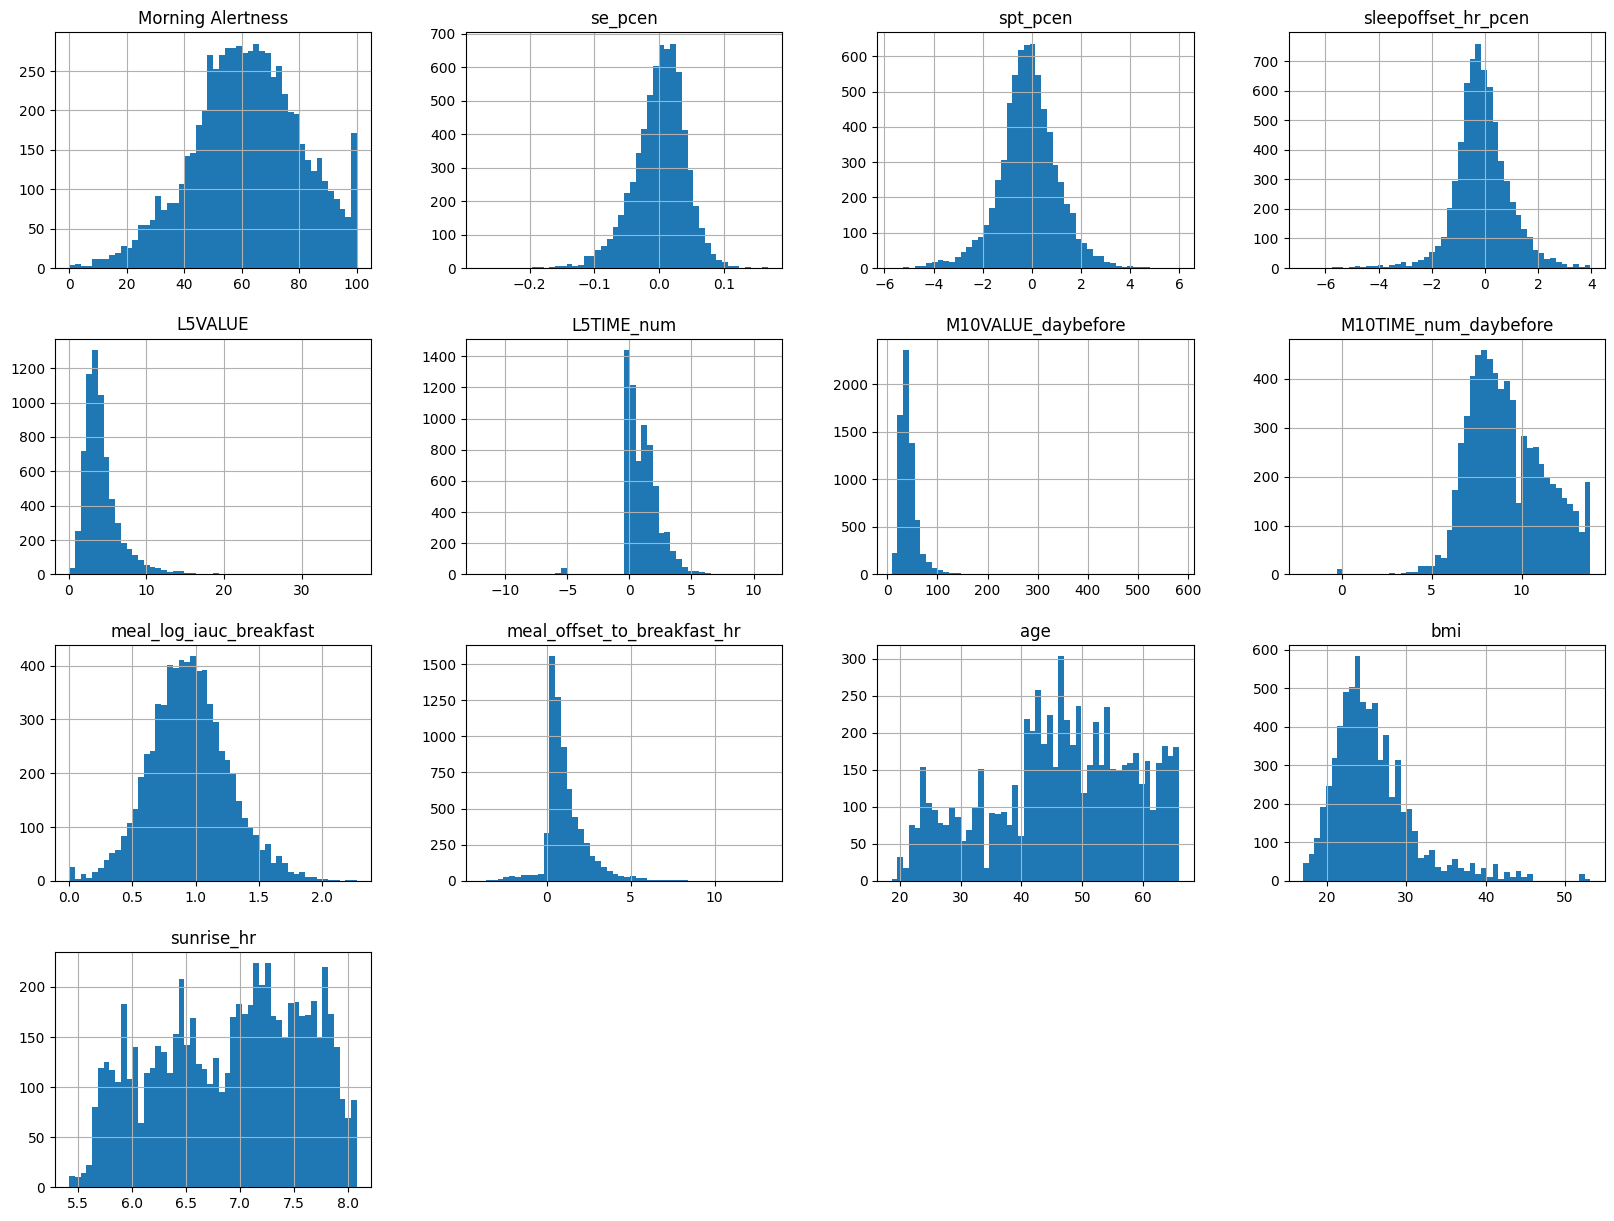

In [21]:
# we can look at the histogram first
data.hist(bins=50, figsize=(20,15))
plt.savefig("/content/drive/MyDrive/f40.png", dpi=600, bbox_inches="tight")
plt.show()

In [22]:
data_skew = data.drop(['meal_type_breakfast_High Carb', 'meal_type_breakfast_High Fat', 'meal_type_breakfast_High Fibre', 'meal_type_breakfast_High Protein',
                      'meal_type_breakfast_MCB', 'meal_type_breakfast_OGTT', 'meal_type_breakfast_UK Average',
                     'sex_F', 'sex_M', 'zygosity_DZ', 'zygosity_MZ', 'zygosity_NT', 'sunrise_hr', 'dst_False',	'dst_True'	,'weekend_False'	,'weekend_True'], axis=1)

In [23]:
data_skew

,Morning Alertness,se_pcen,spt_pcen,sleepoffset_hr_pcen,L5VALUE,L5TIME_num,M10VALUE_daybefore,M10TIME_num_daybefore,meal_log_iauc_breakfast,meal_offset_to_breakfast_hr,age,bmi
0,47.250000,0.001543,0.926686,0.955952,2.721177,0.668056,48.365305,7.834722,0.777249,-0.209444,53.645448,25.530409
1,51.750000,0.034187,0.089186,-0.327381,2.175187,2.668056,17.615711,9.334722,1.012362,1.586944,53.645448,25.530409
2,59.000000,-0.023392,1.571131,1.355952,2.304887,4.668056,56.711167,10.001389,0.774941,0.625833,53.645448,25.530409
3,50.000000,0.003077,0.091072,-0.458333,5.013151,0.334722,54.159403,7.168056,0.864187,2.024722,53.645448,24.272560
4,53.800000,0.036777,-0.175595,0.058333,4.030731,2.668056,48.373843,10.168056,1.248574,2.816667,53.645448,24.272560
...,...,...,...,...,...,...,...,...,...,...,...,...
6739,67.333333,0.022414,-1.448016,-1.704762,3.529514,1.834722,38.509619,9.334722,1.688164,0.947222,55.822040,26.113602
6740,69.666667,0.017670,1.029762,0.778571,3.794901,5.168056,47.939220,12.501389,1.493164,0.111111,55.822040,26.113602
6741,66.000000,-0.028763,-0.141071,-0.371429,2.229535,3.501389,24.526739,10.334722,1.896814,0.264167,55.822040,26.113602
6742,72.666667,-0.033837,-0.886905,0.311905,3.391674,2.168056,40.709453,11.001389,1.604433,-1.285833,55.822040,26.113602


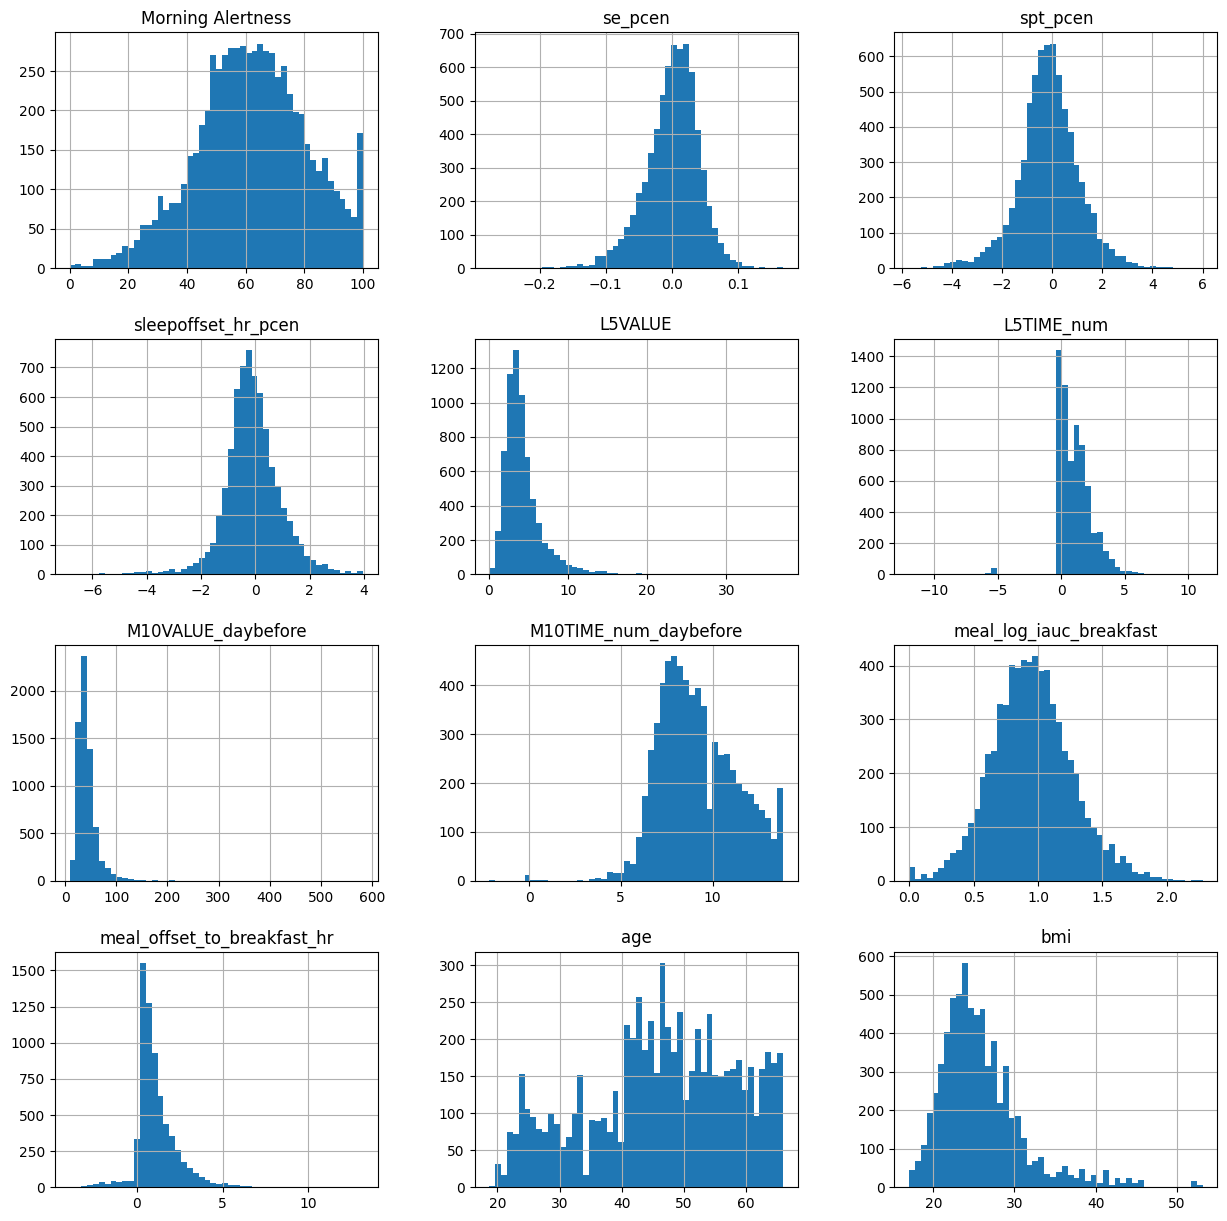

In [24]:
# we can look at the histogram first
data_skew .hist(bins=50, figsize=(15,15))
plt.savefig("/content/drive/MyDrive/f41.png", dpi=600, bbox_inches="tight")
plt.show()

In [25]:
old_skew = data_skew.skew().sort_values(ascending=False)

In [26]:
'''Positive value means the distribution is skewed to the right. Negative value means the distribution is skewed to the left.
0 means perfect normal distribution. The bell shaped curve.
'''
old_skew

,0
M10VALUE_daybefore,5.247796
L5VALUE,2.985383
bmi,1.586766
meal_offset_to_breakfast_hr,1.473586
meal_log_iauc_breakfast,0.205419
M10TIME_num_daybefore,0.174190
spt_pcen,-0.132337
Morning Alertness,-0.172064
sleepoffset_hr_pcen,-0.296334
age,-0.341601


(0, 'Morning Alertness')
(1, 'se_pcen')
(2, 'spt_pcen')
(3, 'sleepoffset_hr_pcen')
(4, 'L5VALUE')
(5, 'L5TIME_num')
(6, 'M10VALUE_daybefore')
(7, 'M10TIME_num_daybefore')
(8, 'meal_log_iauc_breakfast')
(9, 'meal_offset_to_breakfast_hr')
(10, 'age')
(11, 'bmi')


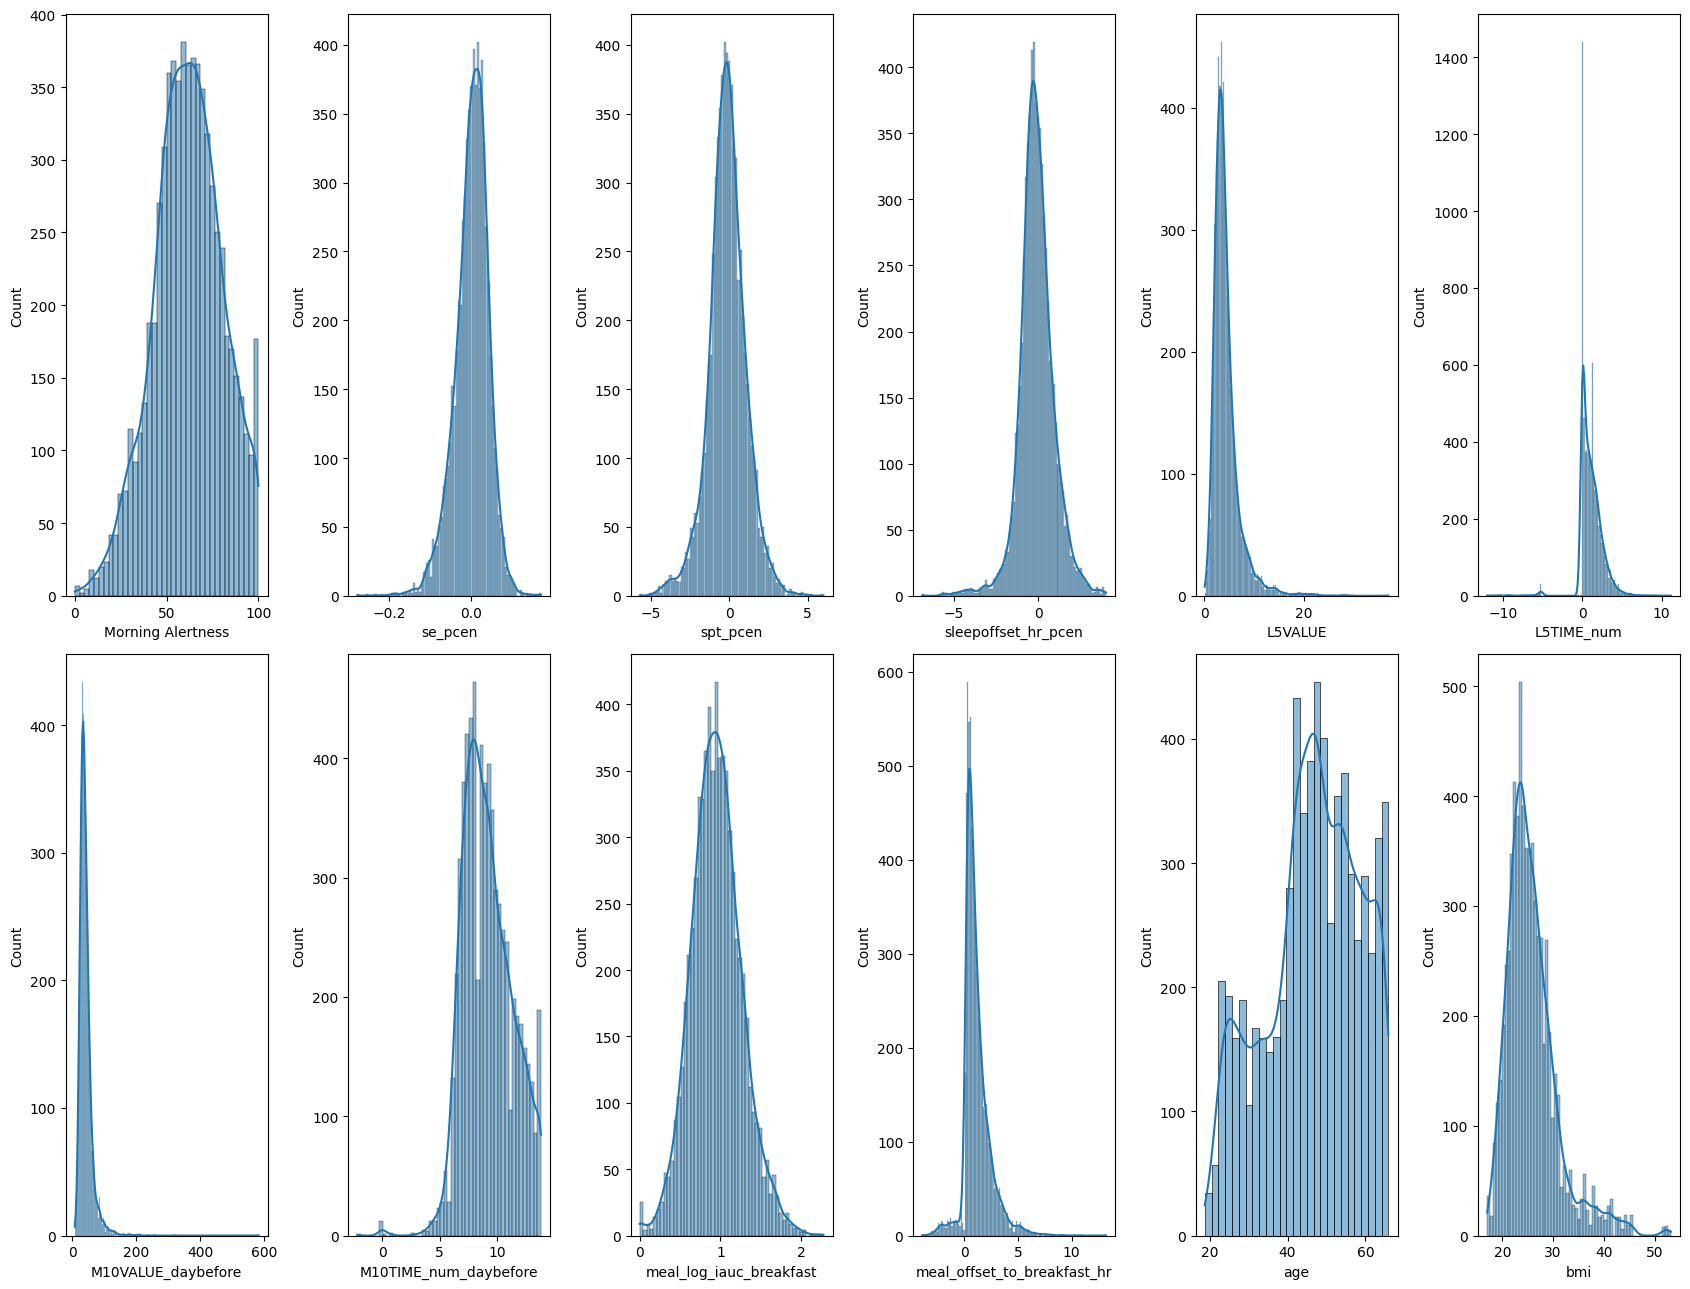

In [28]:
plt.figure(figsize=(17,13))
for i in list(enumerate(data_skew.columns)):
    print(i)
    plt.subplot(2, 6, i[0]+1)
    sns.histplot(data = data_skew[i[1]], kde=True)  # Histogram with KDE line

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/f42.png", dpi=600, bbox_inches="tight")
plt.show()



(0, 'Morning Alertness')
(1, 'se_pcen')
(2, 'spt_pcen')
(3, 'sleepoffset_hr_pcen')
(4, 'L5VALUE')
(5, 'L5TIME_num')
(6, 'M10VALUE_daybefore')
(7, 'M10TIME_num_daybefore')
(8, 'meal_log_iauc_breakfast')
(9, 'meal_offset_to_breakfast_hr')
(10, 'age')
(11, 'bmi')


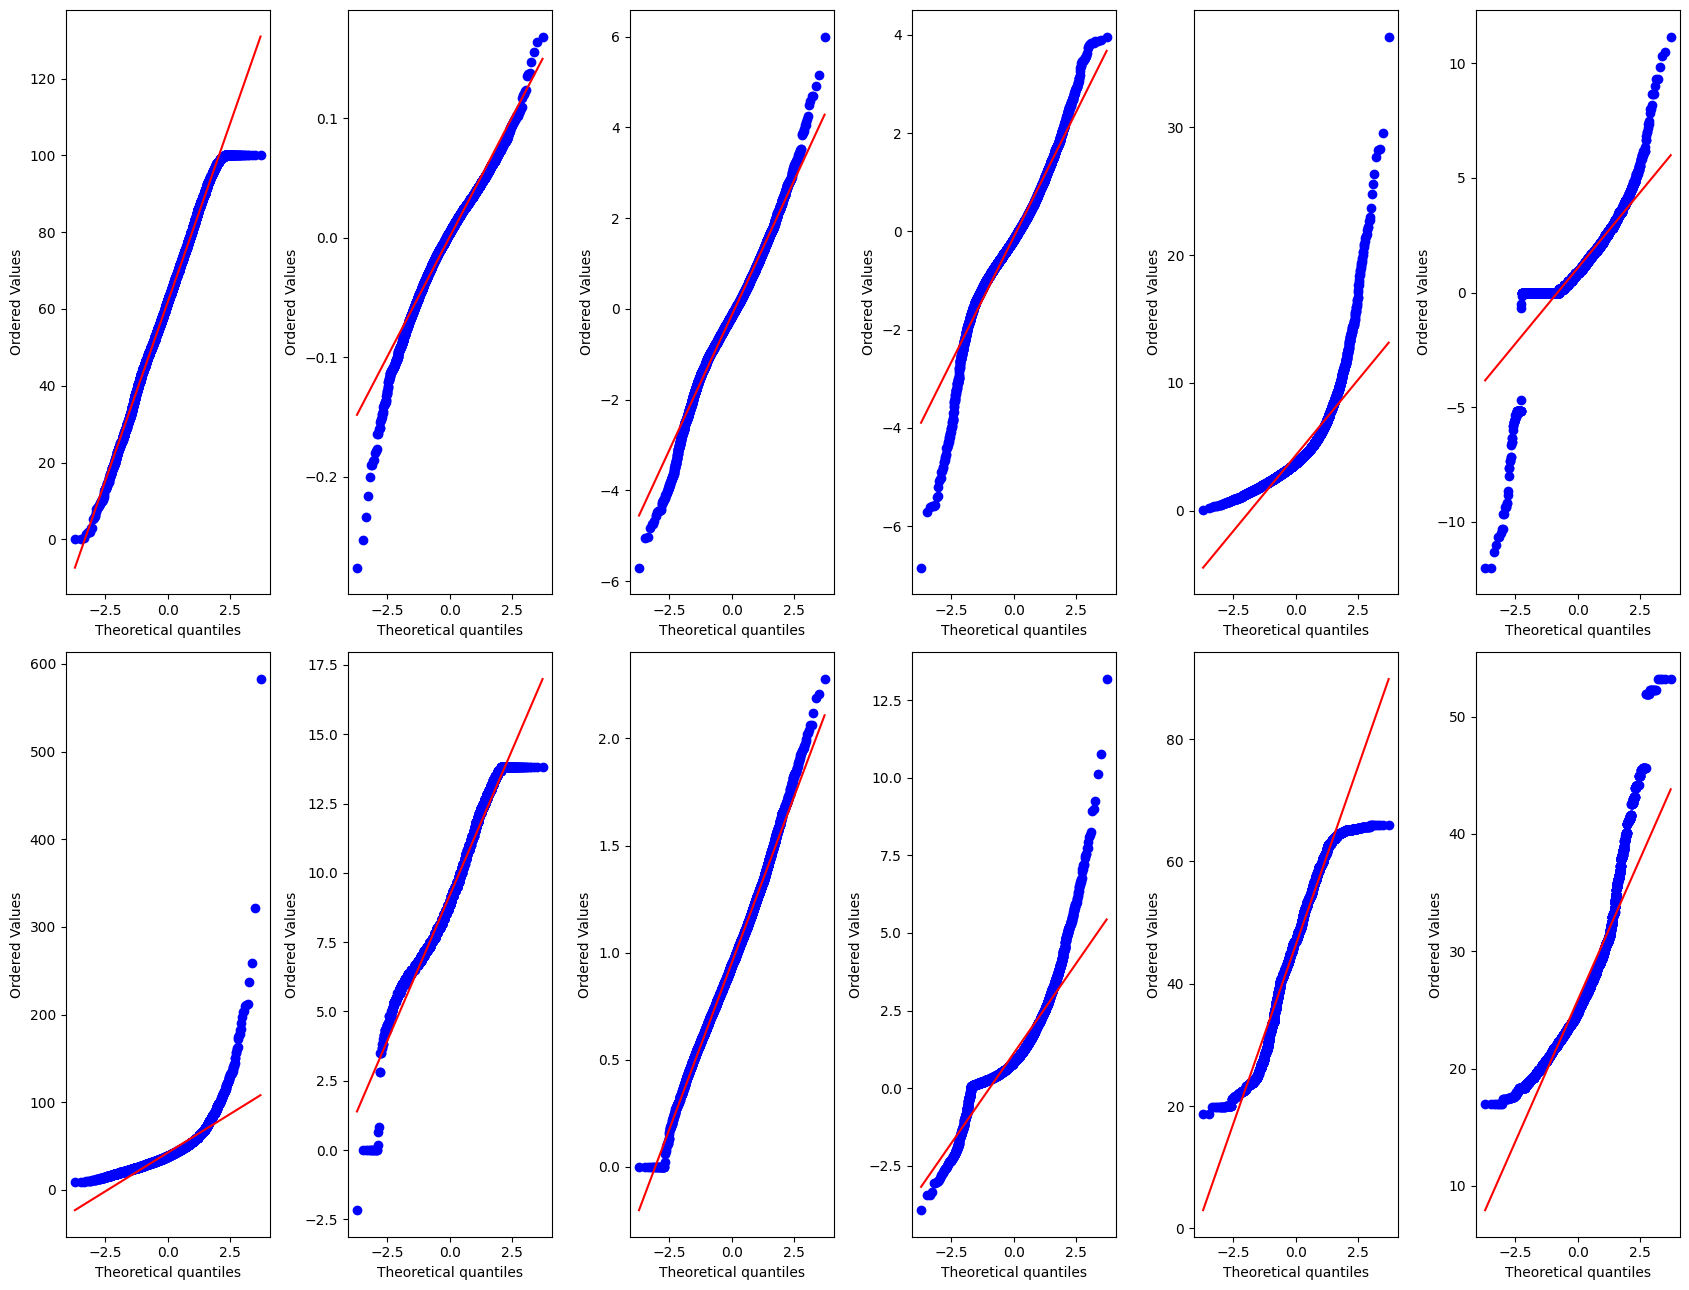

In [29]:
plt.figure(figsize=(17,13))
for i in list(enumerate(data_skew.columns)):
    print(i)
    plt.subplot(2, 6,i[0]+1)
    stats.probplot(data_skew[i[1]], dist="norm", plot=plt)   # QQ Plot
    plt.title("")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/f43.png", dpi=600, bbox_inches="tight")
plt.show()

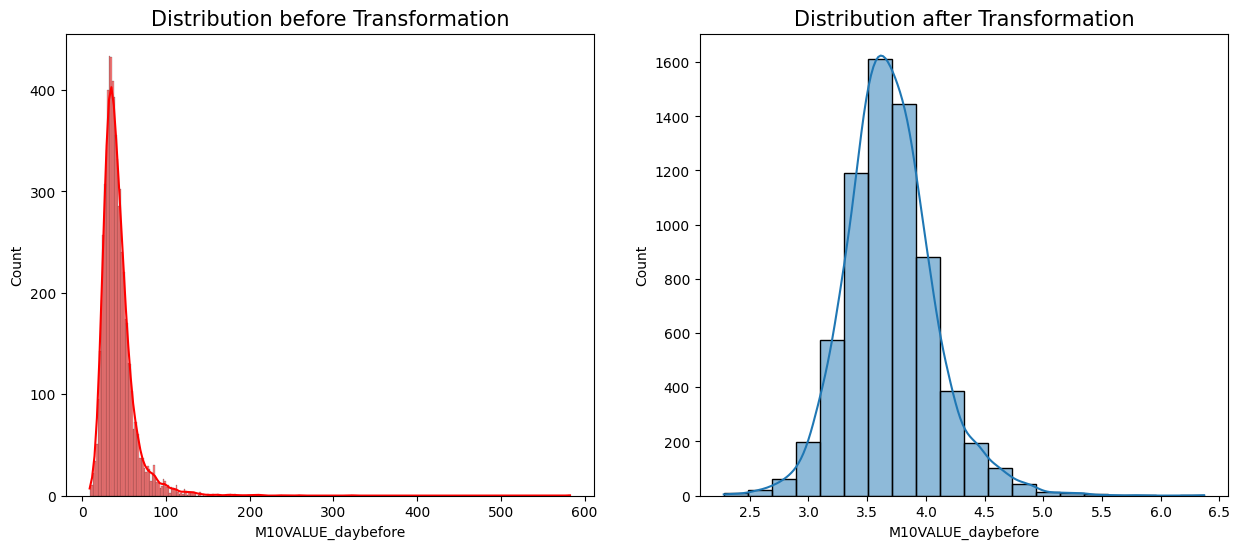

Skewness was 5.25 before & is 0.5 after Log transformation.


In [30]:
# def logTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
feature="M10VALUE_daybefore"
logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Distribution before Transformation", fontsize=15)
sns.histplot(data_skew[feature], kde=True, color="red")
plt.subplot(1,2,2)

df_M10 = pd.DataFrame(logTr.fit_transform(data_skew))
plt.title("Distribution after Transformation", fontsize=15)
sns.histplot(df_M10 ,bins=20, kde=True , legend=False)
plt.xlabel(feature)
plt.savefig("/content/drive/MyDrive/f44.png", dpi=600, bbox_inches="tight")
plt.show()

print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_M10.skew()[0],2)} after Log transformation.")

# logTrans(feature="M10VALUE_daybefore")

In [31]:
df_M10

,0
0,3.899248
1,2.924006
2,4.055451
3,4.010227
4,3.899421
...,...
6739,3.676544
6740,3.890579
6741,3.239726
6742,3.730728


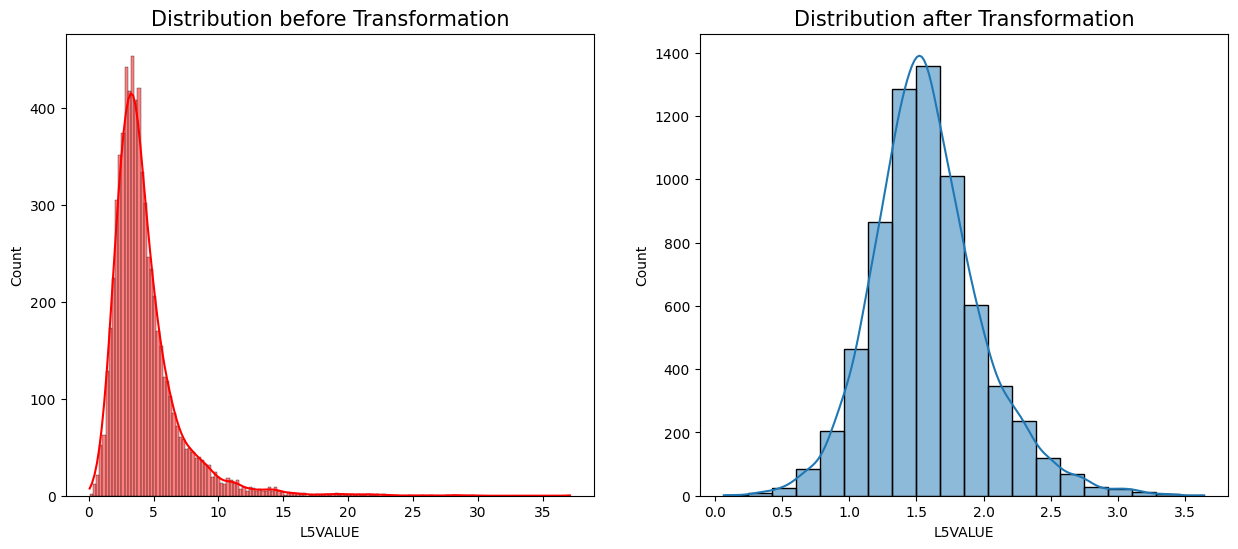

Skewness was 2.99 before & is 0.55 after Log transformation.


In [32]:
# def logTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
feature="L5VALUE"
logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Distribution before Transformation", fontsize=15)
sns.histplot(data_skew[feature], kde=True, color="red")
plt.subplot(1,2,2)

df_L5 = pd.DataFrame(logTr.fit_transform(data_skew))
plt.title("Distribution after Transformation", fontsize=15)
sns.histplot(df_L5 ,bins=20, kde=True , legend=False)
plt.xlabel(feature)
plt.savefig("/content/drive/MyDrive/f45.png", dpi=600, bbox_inches="tight")
plt.show()

print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_L5.skew()[0],2)} after Log transformation.")



In [33]:
df_L5

,0
0,1.314040
1,1.155367
2,1.195402
3,1.793949
4,1.615565
...,...
6739,1.510615
6740,1.567553
6741,1.172338
6742,1.479710


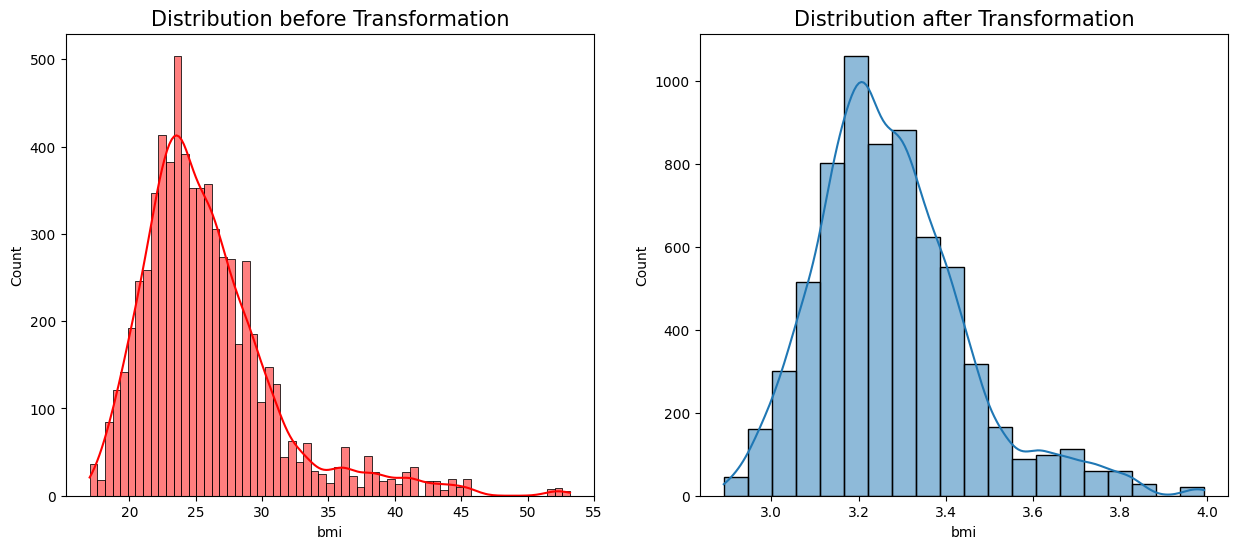

Skewness was 1.59 before & is 0.87 after Log transformation.


In [34]:
# def logTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
feature="bmi"
logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Distribution before Transformation", fontsize=15)
sns.histplot(data_skew[feature], kde=True, color="red")
plt.subplot(1,2,2)

df_bmi = pd.DataFrame(logTr.fit_transform(data_skew))
plt.title("Distribution after Transformation", fontsize=15)
sns.histplot(df_bmi ,bins=20, kde=True , legend=False)
plt.xlabel(feature)
plt.savefig("/content/drive/MyDrive/f46.png", dpi=600, bbox_inches="tight")
plt.show()

print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_bmi.skew()[0],2)} after Log transformation.")

In [35]:
df_bmi

,0
0,3.278292
1,3.278292
2,3.278292
3,3.229719
4,3.229719
...,...
6739,3.300036
6740,3.300036
6741,3.300036
6742,3.300036


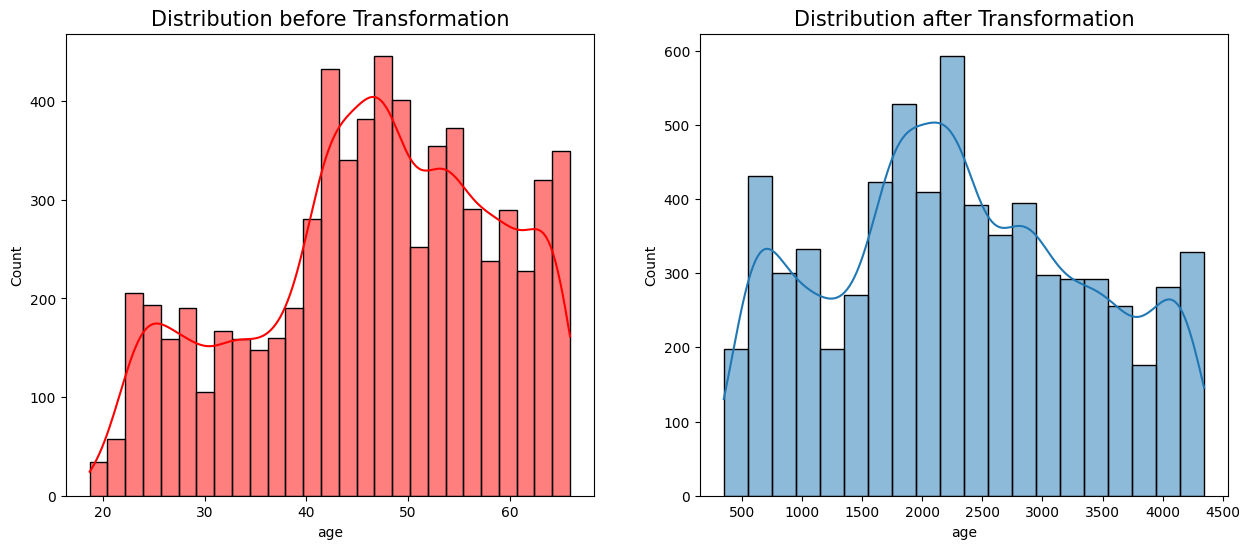

Skewness was -0.34 before & is 0.1 after Square transformation.


In [36]:

# def squareTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
feature="age"

logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.square), [feature])])

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Distribution before Transformation", fontsize=15)
sns.histplot(data_skew[feature], kde=True, color="red")
plt.subplot(1,2,2)

df_age = pd.DataFrame(logTr.fit_transform(data_skew))
plt.title("Distribution after Transformation", fontsize=15)
sns.histplot(df_age,bins=20, kde=True , legend=False)
plt.xlabel(feature)
plt.savefig("/content/drive/MyDrive/f47.png", dpi=600, bbox_inches="tight")
plt.show()

print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_age.skew()[0],2)} after Square transformation.")

# squareTrans(feature="RM")

In [37]:
df_age

,0
0,2877.834126
1,2877.834126
2,2877.834126
3,2877.834126
4,2877.834126
...,...
6739,3116.100116
6740,3116.100116
6741,3116.100116
6742,3116.100116


In [38]:
data_skew

,Morning Alertness,se_pcen,spt_pcen,sleepoffset_hr_pcen,L5VALUE,L5TIME_num,M10VALUE_daybefore,M10TIME_num_daybefore,meal_log_iauc_breakfast,meal_offset_to_breakfast_hr,age,bmi
0,47.250000,0.001543,0.926686,0.955952,2.721177,0.668056,48.365305,7.834722,0.777249,-0.209444,53.645448,25.530409
1,51.750000,0.034187,0.089186,-0.327381,2.175187,2.668056,17.615711,9.334722,1.012362,1.586944,53.645448,25.530409
2,59.000000,-0.023392,1.571131,1.355952,2.304887,4.668056,56.711167,10.001389,0.774941,0.625833,53.645448,25.530409
3,50.000000,0.003077,0.091072,-0.458333,5.013151,0.334722,54.159403,7.168056,0.864187,2.024722,53.645448,24.272560
4,53.800000,0.036777,-0.175595,0.058333,4.030731,2.668056,48.373843,10.168056,1.248574,2.816667,53.645448,24.272560
...,...,...,...,...,...,...,...,...,...,...,...,...
6739,67.333333,0.022414,-1.448016,-1.704762,3.529514,1.834722,38.509619,9.334722,1.688164,0.947222,55.822040,26.113602
6740,69.666667,0.017670,1.029762,0.778571,3.794901,5.168056,47.939220,12.501389,1.493164,0.111111,55.822040,26.113602
6741,66.000000,-0.028763,-0.141071,-0.371429,2.229535,3.501389,24.526739,10.334722,1.896814,0.264167,55.822040,26.113602
6742,72.666667,-0.033837,-0.886905,0.311905,3.391674,2.168056,40.709453,11.001389,1.604433,-1.285833,55.822040,26.113602


In [39]:
data

,Morning Alertness,se_pcen,spt_pcen,sleepoffset_hr_pcen,L5VALUE,L5TIME_num,M10VALUE_daybefore,M10TIME_num_daybefore,meal_log_iauc_breakfast,meal_offset_to_breakfast_hr,...,meal_type_breakfast_UK Average,sex_F,sex_M,zygosity_DZ,zygosity_MZ,zygosity_NT,dst_False,dst_True,weekend_False,weekend_True
0,47.250000,0.001543,0.926686,0.955952,2.721177,0.668056,48.365305,7.834722,0.777249,-0.209444,...,False,True,False,False,True,False,True,False,True,False
1,51.750000,0.034187,0.089186,-0.327381,2.175187,2.668056,17.615711,9.334722,1.012362,1.586944,...,False,True,False,False,True,False,True,False,True,False
2,59.000000,-0.023392,1.571131,1.355952,2.304887,4.668056,56.711167,10.001389,0.774941,0.625833,...,False,True,False,False,True,False,True,False,False,True
3,50.000000,0.003077,0.091072,-0.458333,5.013151,0.334722,54.159403,7.168056,0.864187,2.024722,...,False,True,False,False,True,False,True,False,True,False
4,53.800000,0.036777,-0.175595,0.058333,4.030731,2.668056,48.373843,10.168056,1.248574,2.816667,...,False,True,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,67.333333,0.022414,-1.448016,-1.704762,3.529514,1.834722,38.509619,9.334722,1.688164,0.947222,...,False,True,False,False,True,False,False,True,True,False
6740,69.666667,0.017670,1.029762,0.778571,3.794901,5.168056,47.939220,12.501389,1.493164,0.111111,...,True,True,False,False,True,False,False,True,True,False
6741,66.000000,-0.028763,-0.141071,-0.371429,2.229535,3.501389,24.526739,10.334722,1.896814,0.264167,...,False,True,False,False,True,False,False,True,True,False
6742,72.666667,-0.033837,-0.886905,0.311905,3.391674,2.168056,40.709453,11.001389,1.604433,-1.285833,...,False,True,False,False,True,False,False,True,False,True


In [40]:
final_data = data

In [41]:
final_data

,Morning Alertness,se_pcen,spt_pcen,sleepoffset_hr_pcen,L5VALUE,L5TIME_num,M10VALUE_daybefore,M10TIME_num_daybefore,meal_log_iauc_breakfast,meal_offset_to_breakfast_hr,...,meal_type_breakfast_UK Average,sex_F,sex_M,zygosity_DZ,zygosity_MZ,zygosity_NT,dst_False,dst_True,weekend_False,weekend_True
0,47.250000,0.001543,0.926686,0.955952,2.721177,0.668056,48.365305,7.834722,0.777249,-0.209444,...,False,True,False,False,True,False,True,False,True,False
1,51.750000,0.034187,0.089186,-0.327381,2.175187,2.668056,17.615711,9.334722,1.012362,1.586944,...,False,True,False,False,True,False,True,False,True,False
2,59.000000,-0.023392,1.571131,1.355952,2.304887,4.668056,56.711167,10.001389,0.774941,0.625833,...,False,True,False,False,True,False,True,False,False,True
3,50.000000,0.003077,0.091072,-0.458333,5.013151,0.334722,54.159403,7.168056,0.864187,2.024722,...,False,True,False,False,True,False,True,False,True,False
4,53.800000,0.036777,-0.175595,0.058333,4.030731,2.668056,48.373843,10.168056,1.248574,2.816667,...,False,True,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,67.333333,0.022414,-1.448016,-1.704762,3.529514,1.834722,38.509619,9.334722,1.688164,0.947222,...,False,True,False,False,True,False,False,True,True,False
6740,69.666667,0.017670,1.029762,0.778571,3.794901,5.168056,47.939220,12.501389,1.493164,0.111111,...,True,True,False,False,True,False,False,True,True,False
6741,66.000000,-0.028763,-0.141071,-0.371429,2.229535,3.501389,24.526739,10.334722,1.896814,0.264167,...,False,True,False,False,True,False,False,True,True,False
6742,72.666667,-0.033837,-0.886905,0.311905,3.391674,2.168056,40.709453,11.001389,1.604433,-1.285833,...,False,True,False,False,True,False,False,True,False,True


In [43]:
final_data_col = final_data.columns.to_list()
final_data_col

['Morning Alertness',
 'se_pcen',
 'spt_pcen',
 'sleepoffset_hr_pcen',
 'L5VALUE',
 'L5TIME_num',
 'M10VALUE_daybefore',
 'M10TIME_num_daybefore',
 'meal_log_iauc_breakfast',
 'meal_offset_to_breakfast_hr',
 'age',
 'bmi',
 'sunrise_hr',
 'meal_type_breakfast_High Carb',
 'meal_type_breakfast_High Fat',
 'meal_type_breakfast_High Fibre',
 'meal_type_breakfast_High Protein',
 'meal_type_breakfast_MCB',
 'meal_type_breakfast_OGTT',
 'meal_type_breakfast_UK Average',
 'sex_F',
 'sex_M',
 'zygosity_DZ',
 'zygosity_MZ',
 'zygosity_NT',
 'dst_False',
 'dst_True',
 'weekend_False',
 'weekend_True']

In [44]:
final_data['M10VALUE_daybefore'] = df_M10

In [45]:
final_data['L5VALUE'] = df_L5

In [46]:
final_data['bmi'] = df_bmi

In [47]:
# final_data['age'] = df_age

In [48]:
pd.set_option('display.max_columns', None)

In [49]:
final_data

,Morning Alertness,se_pcen,spt_pcen,sleepoffset_hr_pcen,L5VALUE,L5TIME_num,M10VALUE_daybefore,M10TIME_num_daybefore,meal_log_iauc_breakfast,meal_offset_to_breakfast_hr,age,bmi,sunrise_hr,meal_type_breakfast_High Carb,meal_type_breakfast_High Fat,meal_type_breakfast_High Fibre,meal_type_breakfast_High Protein,meal_type_breakfast_MCB,meal_type_breakfast_OGTT,meal_type_breakfast_UK Average,sex_F,sex_M,zygosity_DZ,zygosity_MZ,zygosity_NT,dst_False,dst_True,weekend_False,weekend_True
0,47.250000,0.001543,0.926686,0.955952,1.314040,0.668056,3.899248,7.834722,0.777249,-0.209444,53.645448,3.278292,7.800000,False,False,False,False,True,False,False,True,False,False,True,False,True,False,True,False
1,51.750000,0.034187,0.089186,-0.327381,1.155367,2.668056,2.924006,9.334722,1.012362,1.586944,53.645448,3.278292,7.733333,False,False,False,False,False,True,False,True,False,False,True,False,True,False,True,False
2,59.000000,-0.023392,1.571131,1.355952,1.195402,4.668056,4.055451,10.001389,0.774941,0.625833,53.645448,3.278292,7.583333,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,True
3,50.000000,0.003077,0.091072,-0.458333,1.793949,0.334722,4.010227,7.168056,0.864187,2.024722,53.645448,3.229719,7.800000,False,False,False,False,True,False,False,True,False,False,True,False,True,False,True,False
4,53.800000,0.036777,-0.175595,0.058333,1.615565,2.668056,3.899421,10.168056,1.248574,2.816667,53.645448,3.229719,7.783333,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,67.333333,0.022414,-1.448016,-1.704762,1.510615,1.834722,3.676544,9.334722,1.688164,0.947222,55.822040,3.300036,7.000000,True,False,False,False,False,False,False,True,False,False,True,False,False,True,True,False
6740,69.666667,0.017670,1.029762,0.778571,1.567553,5.168056,3.890579,12.501389,1.493164,0.111111,55.822040,3.300036,7.083333,False,False,False,False,False,False,True,True,False,False,True,False,False,True,True,False
6741,66.000000,-0.028763,-0.141071,-0.371429,1.172338,3.501389,3.239726,10.334722,1.896814,0.264167,55.822040,3.300036,7.116667,False,False,False,False,False,True,False,True,False,False,True,False,False,True,True,False
6742,72.666667,-0.033837,-0.886905,0.311905,1.479710,2.168056,3.730728,11.001389,1.604433,-1.285833,55.822040,3.300036,7.133333,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,True


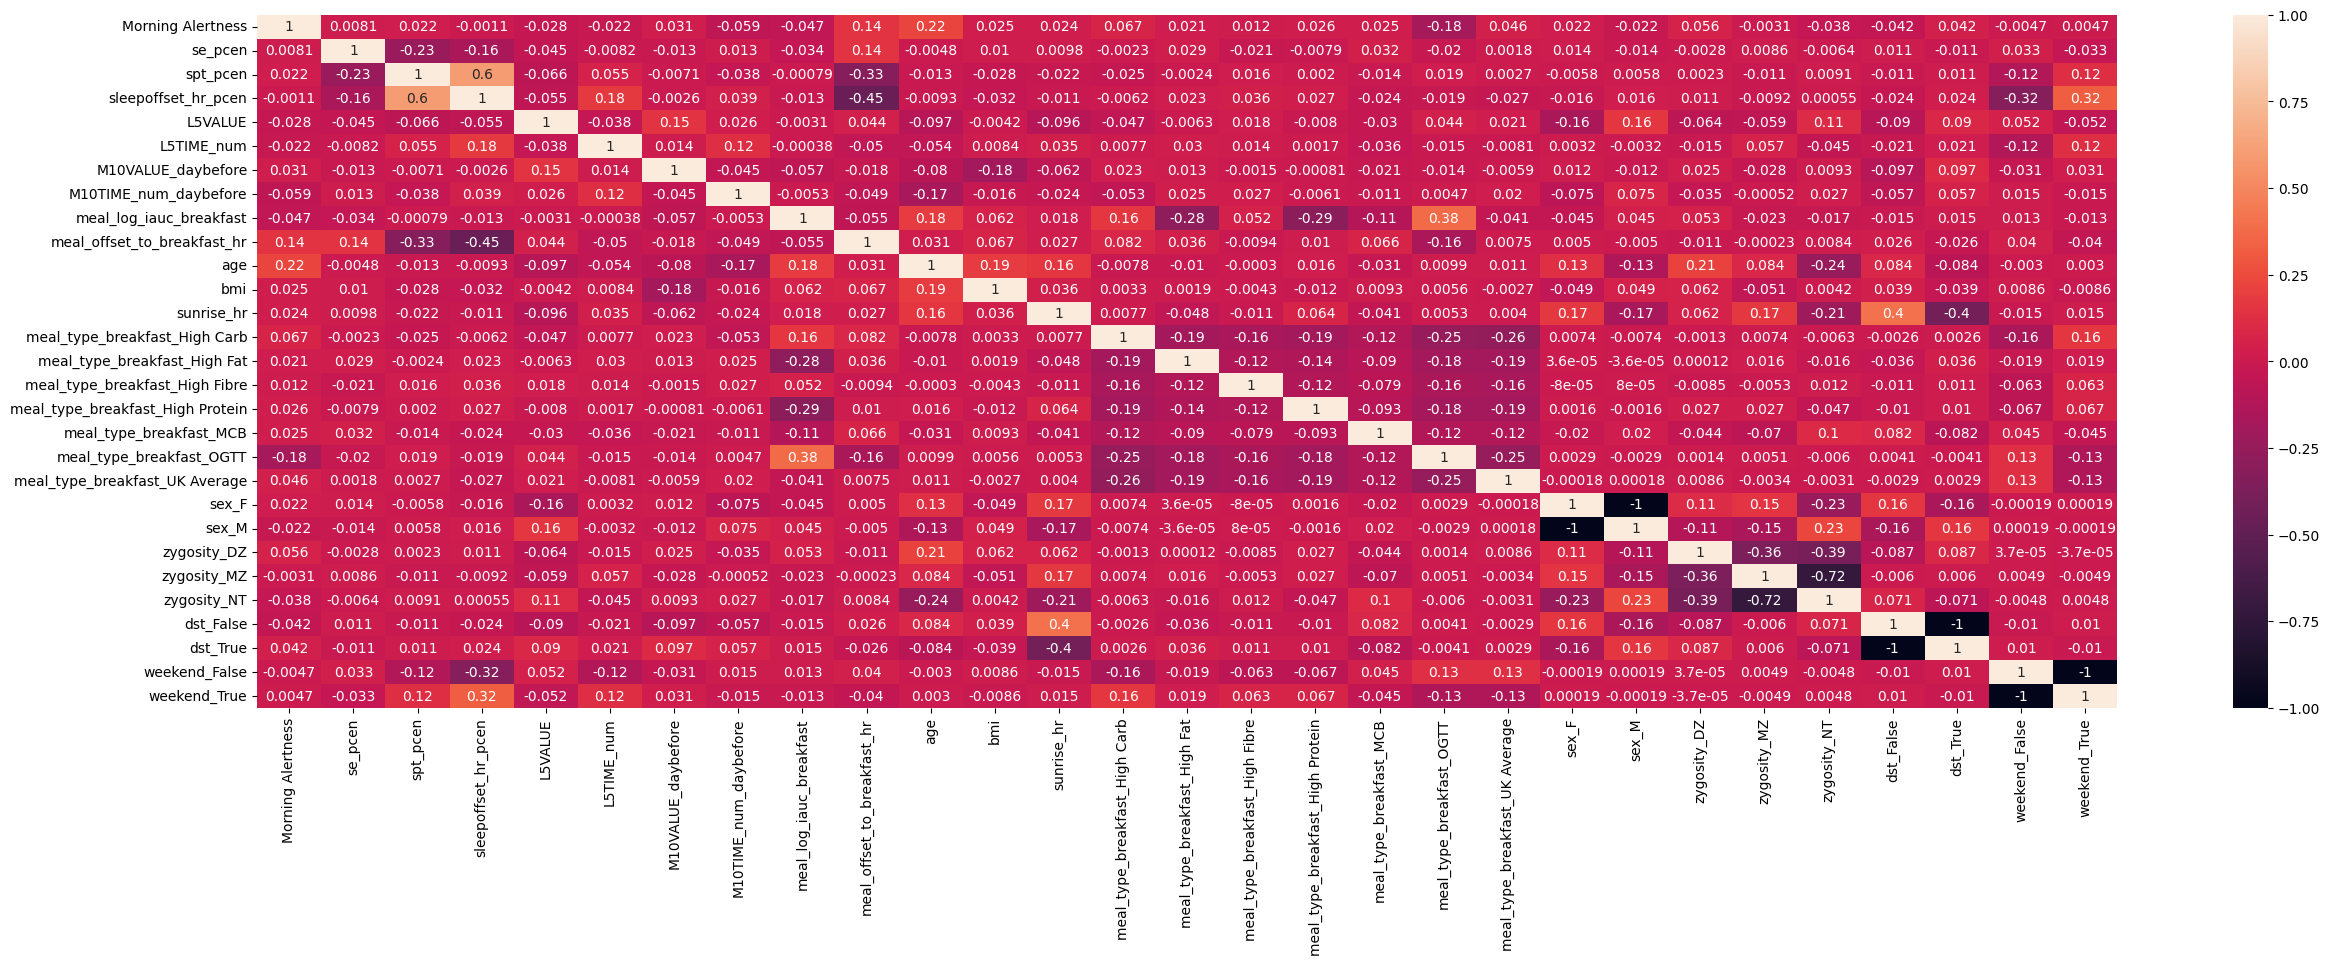

In [50]:
plt.figure(figsize=(30,9))
sns.heatmap(final_data.corr(),annot=True);
plt.savefig("/content/drive/MyDrive/f48.png", dpi=600, bbox_inches="tight")
plt.show()


In [51]:
train_data = raw_data
# train_data = data

In [52]:
train_data

,Morning Alertness,se_pcen,spt_pcen,sleepoffset_hr_pcen,L5VALUE,L5TIME_num,M10VALUE_daybefore,M10TIME_num_daybefore,meal_type_breakfast,meal_log_iauc_breakfast,meal_offset_to_breakfast_hr,age,sex,bmi,zygosity,sunrise_hr,dst,weekend,family_id,username
0,47.250000,0.001543,0.926686,0.955952,2.721177,0.668056,48.365305,7.834722,MCB,0.777249,-0.209444,53.645448,F,25.530409,MZ,7.800000,False,False,predict1009,predict10091
1,51.750000,0.034187,0.089186,-0.327381,2.175187,2.668056,17.615711,9.334722,OGTT,1.012362,1.586944,53.645448,F,25.530409,MZ,7.733333,False,False,predict1009,predict10091
2,59.000000,-0.023392,1.571131,1.355952,2.304887,4.668056,56.711167,10.001389,High Fibre,0.774941,0.625833,53.645448,F,25.530409,MZ,7.583333,False,True,predict1009,predict10091
3,50.000000,0.003077,0.091072,-0.458333,5.013151,0.334722,54.159403,7.168056,MCB,0.864187,2.024722,53.645448,F,24.272560,MZ,7.800000,False,False,predict1009,predict10092
4,53.800000,0.036777,-0.175595,0.058333,4.030731,2.668056,48.373843,10.168056,High Carb,1.248574,2.816667,53.645448,F,24.272560,MZ,7.783333,False,True,predict1009,predict10092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,67.333333,0.022414,-1.448016,-1.704762,3.529514,1.834722,38.509619,9.334722,High Carb,1.688164,0.947222,55.822040,F,26.113602,MZ,7.000000,True,False,predict999,predict9991
6740,69.666667,0.017670,1.029762,0.778571,3.794901,5.168056,47.939220,12.501389,UK Average,1.493164,0.111111,55.822040,F,26.113602,MZ,7.083333,True,False,predict999,predict9991
6741,66.000000,-0.028763,-0.141071,-0.371429,2.229535,3.501389,24.526739,10.334722,OGTT,1.896814,0.264167,55.822040,F,26.113602,MZ,7.116667,True,False,predict999,predict9991
6742,72.666667,-0.033837,-0.886905,0.311905,3.391674,2.168056,40.709453,11.001389,High Fibre,1.604433,-1.285833,55.822040,F,26.113602,MZ,7.133333,True,True,predict999,predict9991


In [53]:
train_data = train_data.drop(['family_id', 'username'], axis = 1)

In [54]:
train_data['M10VALUE_daybefore'] = df_M10
train_data['L5VALUE'] = df_L5
train_data['bmi'] = df_bmi
# train_data['age'] = df_age

In [55]:
train_data

,Morning Alertness,se_pcen,spt_pcen,sleepoffset_hr_pcen,L5VALUE,L5TIME_num,M10VALUE_daybefore,M10TIME_num_daybefore,meal_type_breakfast,meal_log_iauc_breakfast,meal_offset_to_breakfast_hr,age,sex,bmi,zygosity,sunrise_hr,dst,weekend
0,47.250000,0.001543,0.926686,0.955952,1.314040,0.668056,3.899248,7.834722,MCB,0.777249,-0.209444,53.645448,F,3.278292,MZ,7.800000,False,False
1,51.750000,0.034187,0.089186,-0.327381,1.155367,2.668056,2.924006,9.334722,OGTT,1.012362,1.586944,53.645448,F,3.278292,MZ,7.733333,False,False
2,59.000000,-0.023392,1.571131,1.355952,1.195402,4.668056,4.055451,10.001389,High Fibre,0.774941,0.625833,53.645448,F,3.278292,MZ,7.583333,False,True
3,50.000000,0.003077,0.091072,-0.458333,1.793949,0.334722,4.010227,7.168056,MCB,0.864187,2.024722,53.645448,F,3.229719,MZ,7.800000,False,False
4,53.800000,0.036777,-0.175595,0.058333,1.615565,2.668056,3.899421,10.168056,High Carb,1.248574,2.816667,53.645448,F,3.229719,MZ,7.783333,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,67.333333,0.022414,-1.448016,-1.704762,1.510615,1.834722,3.676544,9.334722,High Carb,1.688164,0.947222,55.822040,F,3.300036,MZ,7.000000,True,False
6740,69.666667,0.017670,1.029762,0.778571,1.567553,5.168056,3.890579,12.501389,UK Average,1.493164,0.111111,55.822040,F,3.300036,MZ,7.083333,True,False
6741,66.000000,-0.028763,-0.141071,-0.371429,1.172338,3.501389,3.239726,10.334722,OGTT,1.896814,0.264167,55.822040,F,3.300036,MZ,7.116667,True,False
6742,72.666667,-0.033837,-0.886905,0.311905,1.479710,2.168056,3.730728,11.001389,High Fibre,1.604433,-1.285833,55.822040,F,3.300036,MZ,7.133333,True,True


In [56]:
X = train_data.drop("Morning Alertness",axis=1)

In [57]:
X

,se_pcen,spt_pcen,sleepoffset_hr_pcen,L5VALUE,L5TIME_num,M10VALUE_daybefore,M10TIME_num_daybefore,meal_type_breakfast,meal_log_iauc_breakfast,meal_offset_to_breakfast_hr,age,sex,bmi,zygosity,sunrise_hr,dst,weekend
0,0.001543,0.926686,0.955952,1.314040,0.668056,3.899248,7.834722,MCB,0.777249,-0.209444,53.645448,F,3.278292,MZ,7.800000,False,False
1,0.034187,0.089186,-0.327381,1.155367,2.668056,2.924006,9.334722,OGTT,1.012362,1.586944,53.645448,F,3.278292,MZ,7.733333,False,False
2,-0.023392,1.571131,1.355952,1.195402,4.668056,4.055451,10.001389,High Fibre,0.774941,0.625833,53.645448,F,3.278292,MZ,7.583333,False,True
3,0.003077,0.091072,-0.458333,1.793949,0.334722,4.010227,7.168056,MCB,0.864187,2.024722,53.645448,F,3.229719,MZ,7.800000,False,False
4,0.036777,-0.175595,0.058333,1.615565,2.668056,3.899421,10.168056,High Carb,1.248574,2.816667,53.645448,F,3.229719,MZ,7.783333,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,0.022414,-1.448016,-1.704762,1.510615,1.834722,3.676544,9.334722,High Carb,1.688164,0.947222,55.822040,F,3.300036,MZ,7.000000,True,False
6740,0.017670,1.029762,0.778571,1.567553,5.168056,3.890579,12.501389,UK Average,1.493164,0.111111,55.822040,F,3.300036,MZ,7.083333,True,False
6741,-0.028763,-0.141071,-0.371429,1.172338,3.501389,3.239726,10.334722,OGTT,1.896814,0.264167,55.822040,F,3.300036,MZ,7.116667,True,False
6742,-0.033837,-0.886905,0.311905,1.479710,2.168056,3.730728,11.001389,High Fibre,1.604433,-1.285833,55.822040,F,3.300036,MZ,7.133333,True,True


In [58]:
y = train_data['Morning Alertness']

In [59]:
y

,Morning Alertness
0,47.250000
1,51.750000
2,59.000000
3,50.000000
4,53.800000
...,...
6739,67.333333
6740,69.666667
6741,66.000000
6742,72.666667


In [60]:
ct = make_column_transformer(
    (StandardScaler(),['se_pcen','spt_pcen','sleepoffset_hr_pcen','L5VALUE','L5TIME_num','M10VALUE_daybefore','M10TIME_num_daybefore','meal_log_iauc_breakfast','meal_offset_to_breakfast_hr','age','bmi','sunrise_hr',]), #turn all values from 0 to 1
    (OneHotEncoder(handle_unknown="ignore"), ["meal_type_breakfast","sex",'zygosity','dst','weekend'])
)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True)

In [62]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5395, 17), (1349, 17), (5395,), (1349,))

In [63]:

x_train

,se_pcen,spt_pcen,sleepoffset_hr_pcen,L5VALUE,L5TIME_num,M10VALUE_daybefore,M10TIME_num_daybefore,meal_type_breakfast,meal_log_iauc_breakfast,meal_offset_to_breakfast_hr,age,sex,bmi,zygosity,sunrise_hr,dst,weekend
4823,0.005155,0.349901,-0.329762,1.023162,1.668056,3.831577,8.834722,High Fibre,0.781730,0.793889,35.345654,M,3.420545,NT,6.200000,False,True
5799,-0.016534,-0.323379,0.105556,1.554331,2.334722,3.426681,9.001389,OGTT,0.907190,0.230556,64.027379,F,3.300009,DZ,7.483333,True,False
4174,0.000065,2.135577,0.541026,1.885439,0.168056,3.328014,8.168056,OGTT,1.394136,0.945000,46.932238,M,3.174454,NT,7.366667,False,False
1027,-0.008480,0.294765,0.929487,1.807587,0.501389,3.827570,8.334722,High Protein,0.824390,0.637500,59.044490,F,3.303266,DZ,7.766667,False,True
4532,-0.006866,-0.199802,-0.407143,1.725794,1.501389,3.298358,12.001389,MCB,0.390219,2.318056,44.908966,M,3.220317,NT,6.766667,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-0.069145,0.475992,0.217857,1.501934,0.501389,3.545520,8.834722,High Fat,0.502959,1.066389,27.890486,F,3.153509,NT,7.533333,False,True
5191,-0.022797,0.025232,1.036111,2.185976,0.001389,4.502806,11.334722,MCB,0.611348,0.523611,27.091034,M,3.249116,NT,6.416667,True,True
5226,0.011449,0.159524,-0.411905,1.151207,0.668056,3.753292,10.668056,High Protein,0.649286,2.093056,47.107461,F,2.993129,NT,5.900000,True,True
5390,0.026701,-0.385814,0.110714,1.315487,0.168056,3.612767,6.334722,High Carb,0.584958,1.048611,56.375086,M,3.381501,NT,5.900000,True,True


In [64]:

X_train_normal = pd.DataFrame(ct.fit_transform(x_train))
X_test_normal = pd.DataFrame(ct.transform(x_test))

In [65]:
col = final_data_col[1:]

In [66]:
col

['se_pcen',
 'spt_pcen',
 'sleepoffset_hr_pcen',
 'L5VALUE',
 'L5TIME_num',
 'M10VALUE_daybefore',
 'M10TIME_num_daybefore',
 'meal_log_iauc_breakfast',
 'meal_offset_to_breakfast_hr',
 'age',
 'bmi',
 'sunrise_hr',
 'meal_type_breakfast_High Carb',
 'meal_type_breakfast_High Fat',
 'meal_type_breakfast_High Fibre',
 'meal_type_breakfast_High Protein',
 'meal_type_breakfast_MCB',
 'meal_type_breakfast_OGTT',
 'meal_type_breakfast_UK Average',
 'sex_F',
 'sex_M',
 'zygosity_DZ',
 'zygosity_MZ',
 'zygosity_NT',
 'dst_False',
 'dst_True',
 'weekend_False',
 'weekend_True']

In [67]:
col_dict = dict(zip(X_train_normal.columns, col))

In [68]:
X_train_normal = X_train_normal.rename(columns=col_dict)

In [69]:
X_train_normal

,se_pcen,spt_pcen,sleepoffset_hr_pcen,L5VALUE,L5TIME_num,M10VALUE_daybefore,M10TIME_num_daybefore,meal_log_iauc_breakfast,meal_offset_to_breakfast_hr,age,bmi,sunrise_hr,meal_type_breakfast_High Carb,meal_type_breakfast_High Fat,meal_type_breakfast_High Fibre,meal_type_breakfast_High Protein,meal_type_breakfast_MCB,meal_type_breakfast_OGTT,meal_type_breakfast_UK Average,sex_F,sex_M,zygosity_DZ,zygosity_MZ,zygosity_NT,dst_False,dst_True,weekend_False,weekend_True
0,0.106008,0.406035,-0.216971,-1.369023,0.394310,0.365222,-0.165312,-0.554911,-0.268391,-0.927336,0.827370,-1.044233,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,-0.434824,-0.152112,0.201352,-0.067435,0.841288,-0.703379,-0.087064,-0.150812,-0.725867,1.484709,0.140069,0.854674,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.020915,1.886354,0.619821,0.743920,-0.611393,-0.963782,-0.478300,1.417603,-0.145675,0.047060,-0.575854,0.682046,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,-0.233991,0.360327,0.993116,0.553149,-0.387904,0.354647,-0.400053,-0.417505,-0.395392,1.065663,0.158639,1.273913,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.193745,-0.049667,-0.291331,0.352722,0.282565,-1.042050,1.321385,-1.815937,0.969368,-0.123091,-0.314337,-0.205755,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5390,-1.746719,0.510564,0.309269,-0.195828,-0.387904,-0.389740,-0.165312,-1.452808,-0.047096,-1.554292,-0.695283,0.928657,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
5391,-0.590996,0.136886,1.095577,1.480361,-0.723138,2.136732,1.008396,-1.103695,-0.487880,-1.621524,-0.150126,-0.723638,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5392,0.262954,0.248213,-0.295907,-1.055257,-0.276159,0.158611,0.695408,-0.981500,0.786648,0.061796,-1.609778,-1.488133,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5393,0.643274,-0.203870,0.206309,-0.652702,-0.611393,-0.212261,-1.339019,-1.188696,-0.061533,0.841175,0.604743,-1.488133,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [70]:
X_test_normal = X_test_normal.rename(columns=col_dict)

In [71]:
X_test_normal

,se_pcen,spt_pcen,sleepoffset_hr_pcen,L5VALUE,L5TIME_num,M10VALUE_daybefore,M10TIME_num_daybefore,meal_log_iauc_breakfast,meal_offset_to_breakfast_hr,age,bmi,sunrise_hr,meal_type_breakfast_High Carb,meal_type_breakfast_High Fat,meal_type_breakfast_High Fibre,meal_type_breakfast_High Protein,meal_type_breakfast_MCB,meal_type_breakfast_OGTT,meal_type_breakfast_UK Average,sex_F,sex_M,zygosity_DZ,zygosity_MZ,zygosity_NT,dst_False,dst_True,weekend_False,weekend_True
0,0.698257,-0.321558,0.035853,-0.155752,-0.723138,2.373397,-0.791289,0.317730,1.829505,0.577314,-0.333190,0.114840,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.923452,-0.236026,0.972788,-0.526888,0.729544,0.407703,-0.243559,-0.493605,-0.496452,1.551940,0.835922,1.199929,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.285445,-0.343722,-0.146996,2.781552,-0.164415,0.405688,-1.339019,-0.846542,-0.332004,0.594813,0.546186,-0.304399,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.298786,-0.140544,2.545786,-0.675867,0.729544,0.193962,-0.165312,-0.569844,-0.773013,0.178991,2.856147,-0.994911,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.860440,-0.231420,-1.354105,0.491628,0.059075,2.828740,0.069430,0.091216,-0.794444,-1.121662,-0.855034,-1.512794,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,0.787777,-1.042488,-0.526994,3.684850,0.059075,0.697124,1.086643,-0.640686,-0.371030,0.050744,0.284375,-2.006017,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1345,0.110896,0.351756,-0.744354,0.776413,0.617799,0.949244,-0.243559,-1.046564,-0.467352,0.948238,-0.016099,-0.501688,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1346,1.640231,0.141627,-0.559026,-1.296252,0.282565,0.961021,-0.321806,0.656659,-0.676691,-1.481305,-1.777713,-0.797622,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1347,0.212334,0.504782,-0.395347,-0.779500,0.282565,0.490135,-1.026031,-0.520601,0.224051,-0.837771,1.039343,1.101285,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
# X_train_normal = x_train
# X_test_normal = x_test

In [72]:
#making dictionary of models
models = {
    'SVR':SVR(),
    'XGBRegressor':XGBRegressor(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [73]:
from sklearn.metrics import mean_squared_error
#taking results from the models
model_results = []
model_names = []

# training the model with function
for name,model in models.items():
    a = model.fit(X_train_normal,y_train)
    predicted = a.predict(X_test_normal)
    score = np.sqrt(mean_squared_error(y_test, predicted))
    model_results.append(score)
    model_names.append(name)

    #creating dataframe
    df_results = pd.DataFrame([model_names,model_results])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'RMSE'}).sort_values(by='RMSE',ascending=False)

print(df_results)

                   Model       RMSE
3             ElasticNet  18.239191
4           SGDRegressor   17.83686
0                    SVR   17.83207
5          BayesianRidge  17.775519
2                  Ridge  17.764611
6       LinearRegression  17.764525
7  RandomForestRegressor  15.997079
1           XGBRegressor  15.417761


In [74]:
MLR =  XGBRegressor()
xgb_model = MLR.fit(X_train_normal,y_train)



In [75]:
# file_name = "../model/xgb_reg.pkl"
# pickle.dump(xgb_model, open(file_name, "wb"))

In [76]:
# Predicting the Test set results
y_predict = MLR.predict(X_test_normal)

In [77]:
type(y_test)

pandas.core.series.Series

In [78]:
df = y_test.to_frame()

In [79]:
df = df.rename(columns={'Morning Alertness': 'y_test'})

In [80]:
df

,y_test
3599,72.666667
1407,72.500000
1550,46.000000
3400,54.500000
2345,17.000000
...,...
1225,48.800000
1487,76.666667
3541,47.000000
4162,70.666667


In [81]:


df['y_predict'] = y_predict


In [82]:
df.head(20)

,y_test,y_predict
3599,72.666667,80.363869
1407,72.500000,59.031055
1550,46.000000,71.520294
3400,54.500000,64.844307
2345,17.000000,44.964920
5079,77.250000,64.093918
1741,61.000000,65.517509
2202,87.750000,55.651474
4740,40.666667,49.815746
5584,76.000000,58.771523


In [ ]:
# df.to_csv('../data/predicted_result.csv')

In [83]:
train_predictions = MLR.predict(X_train_normal)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = MLR.predict(X_test_normal)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train R2 score: 0.9141411497296246
Test R2 score: 0.33363380190161684


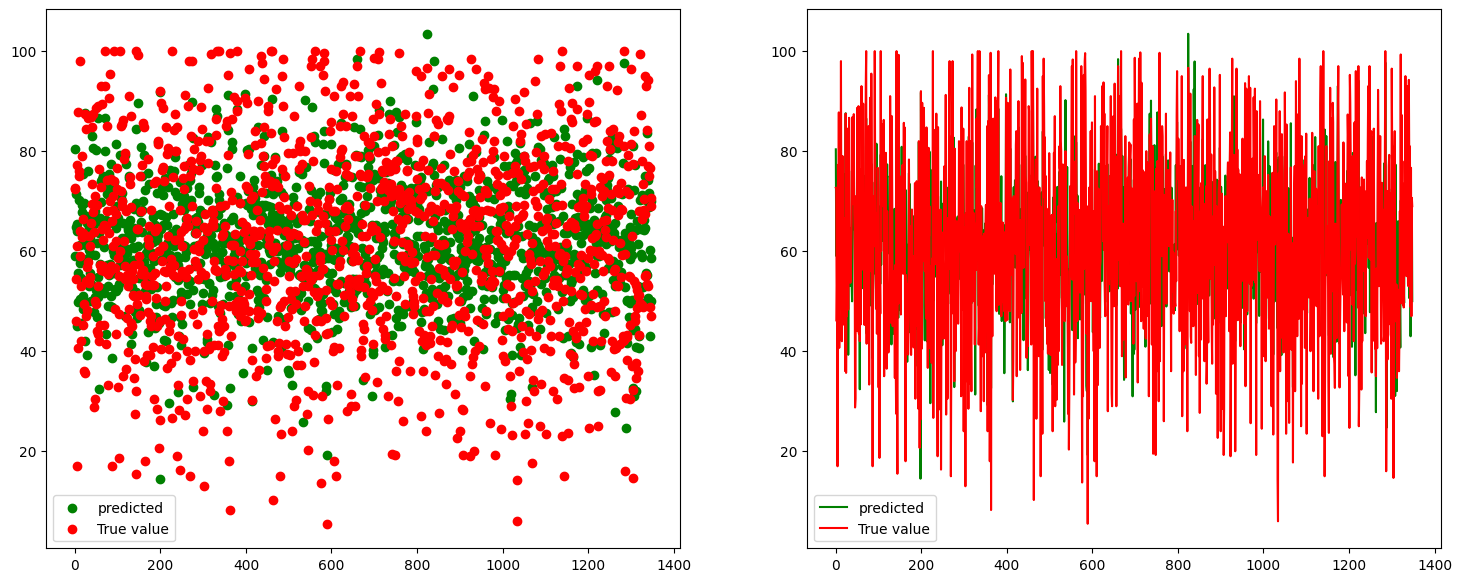

In [84]:

# winner
reg = XGBRegressor()
reg.fit(X_train_normal,y_train)
pred = reg.predict(X_test_normal)
plt.figure(figsize=(18,7))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(range(0,len(X_test_normal)), pred,color="green",label="predicted")
plt.scatter(range(0,len(X_test_normal)), y_test,color="red",label="True value")
plt.legend()

plt.subplot(1, 2, 2) # index 2
plt.plot(range(0,len(X_test_normal)), pred,color="green",label="predicted")
plt.plot(range(0,len(X_test_normal)), y_test,color="red",label="True value")
plt.legend()
plt.savefig("/content/drive/MyDrive/f49.png", dpi=600, bbox_inches="tight")
plt.show()


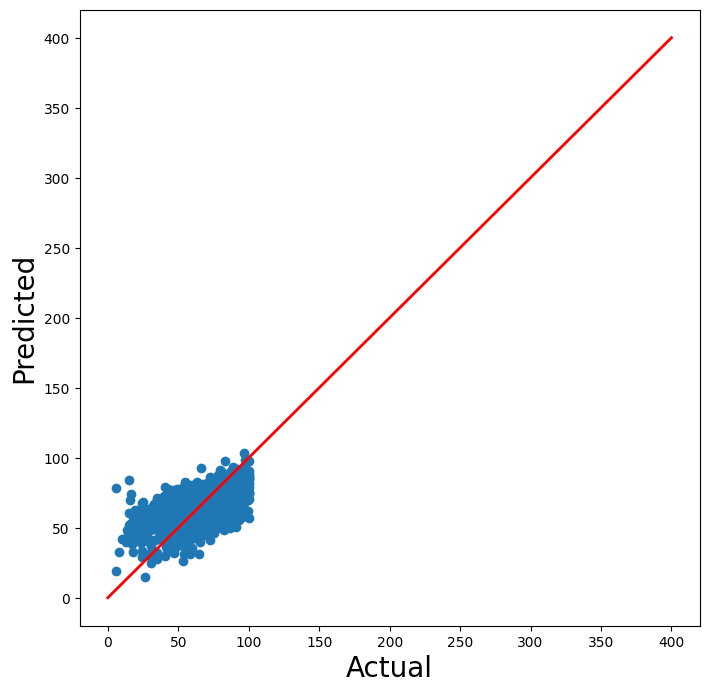

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(y_test,y_predict)
plt.plot([0, 400], [0, 400], color='r', linestyle='-', linewidth=2)

plt.ylabel('Predicted',size=20)
plt.xlabel('Actual',size=20)

plt.show()

In [86]:

import plotly.graph_objs as go
from xgboost import plot_importance




importance_scores = MLR.get_booster().get_score(importance_type='weight')


fig = go.Figure(
    data=go.Bar(
        x=list(importance_scores.values()),
        y=list(importance_scores.keys()),
        orientation='h',
        marker=dict(color='rgba(50, 171, 96, 0.6)')
    )
)

fig.update_layout(
    title='Feature Importance',
    xaxis_title='Importance Score',
    yaxis_title='Feature',
    font=dict(size=16),
    margin=dict(l=200),
    height=600,
    width=1000
)


plt.savefig("/content/drive/MyDrive/f50.png", dpi=600, bbox_inches="tight")
fig.show()

<Figure size 640x480 with 0 Axes>

In [87]:
import plotly.graph_objects as go
from xgboost import XGBRegressor

importance_scores = MLR.get_booster().get_score(importance_type='weight')

sorted_features = sorted(importance_scores.items(), key=lambda x: x[1], reverse=True)
features = [x[0] for x in sorted_features]
scores = [x[1] for x in sorted_features]

fig = go.Figure(
    data=go.Bar(
        x=scores,
        y=features,
        orientation='h',
        marker=dict(color='rgba(58, 71, 80, 0.8)')
    )
)

fig.update_layout(
    title="XGBoost Feature Importance",
    xaxis_title="Importance Score",
    yaxis_title="Features",
    font=dict(size=14),
    margin=dict(l=200),
    height=600,
    width=1000
)

plt.savefig("/content/drive/MyDrive/f51.png", dpi=600, bbox_inches="tight")
fig.show()



<Figure size 640x480 with 0 Axes>

In [88]:
explainer_2 = shap.Explainer(MLR, X_train_normal)
shap_values_2 = explainer_2.shap_values(X_train_normal)

 98%|===================| 5302/5395 [00:21<00:00]       

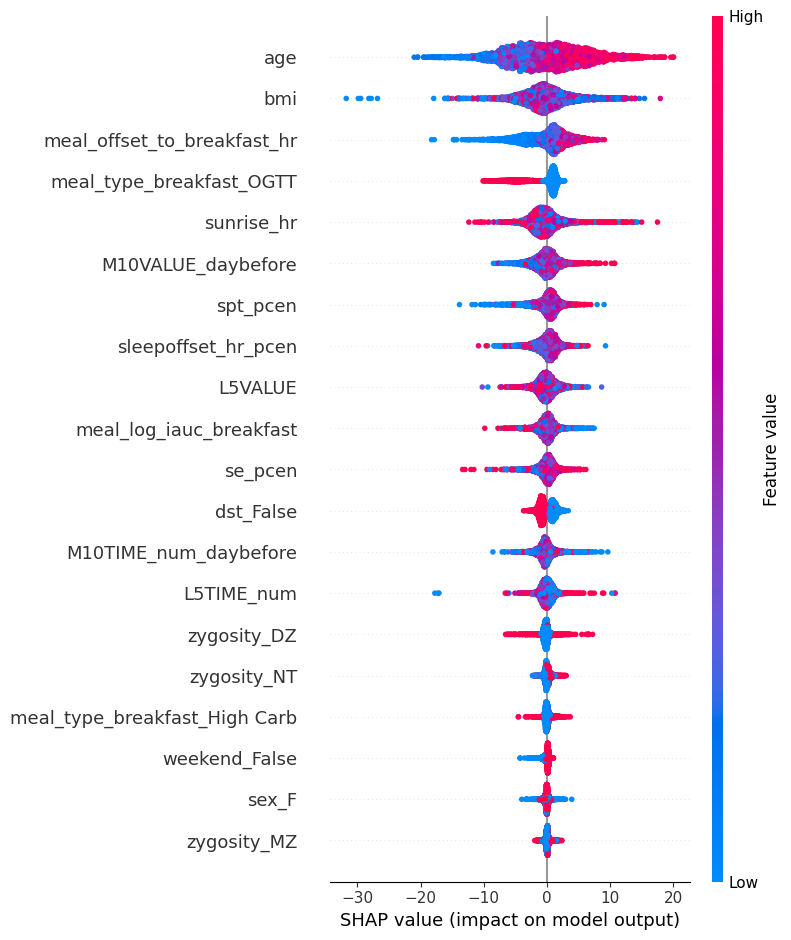

<Figure size 640x480 with 0 Axes>

In [89]:
shap.summary_plot(shap_values_2, X_train_normal)
plt.savefig("/content/drive/MyDrive/f52.png", dpi=600, bbox_inches="tight")

In [90]:
shap_df = pd.DataFrame(np.abs(shap_values_2), index=X_train_normal.index,columns=X_train_normal.columns)
shap_df

,se_pcen,spt_pcen,sleepoffset_hr_pcen,L5VALUE,L5TIME_num,M10VALUE_daybefore,M10TIME_num_daybefore,meal_log_iauc_breakfast,meal_offset_to_breakfast_hr,age,bmi,sunrise_hr,meal_type_breakfast_High Carb,meal_type_breakfast_High Fat,meal_type_breakfast_High Fibre,meal_type_breakfast_High Protein,meal_type_breakfast_MCB,meal_type_breakfast_OGTT,meal_type_breakfast_UK Average,sex_F,sex_M,zygosity_DZ,zygosity_MZ,zygosity_NT,dst_False,dst_True,weekend_False,weekend_True
0,0.362469,0.406118,1.096200,0.078805,0.992124,0.337923,0.183223,1.702113,0.285797,2.239925,0.381087,1.772961,0.264362,0.021820,0.242105,0.048274,0.032285,0.965605,0.047036,0.189078,0.0,0.347208,0.307871,0.191016,0.974519,0.0,0.429823,0.0
1,1.007048,1.160278,0.249245,0.359363,0.462415,0.627899,0.512154,2.103108,3.397244,11.489723,3.704418,1.685841,0.178980,0.031779,0.088864,0.109122,0.051248,0.789513,0.012459,0.017748,0.0,6.525814,0.095276,0.048646,1.622546,0.0,0.283126,0.0
2,0.172234,3.497433,2.645224,0.281035,1.563659,0.229983,0.966787,0.312024,1.841338,5.035972,4.841573,0.148356,0.245959,0.045627,0.178323,0.005836,0.051256,3.661762,0.005153,1.245613,0.0,0.142082,0.540733,0.230064,0.758852,0.0,0.201481,0.0
3,0.008099,1.057538,0.506730,1.000184,0.095338,0.005286,0.110699,1.690325,1.959622,3.433707,4.039698,3.114822,0.151921,0.091969,0.036182,0.359561,0.007377,0.768398,0.010102,0.013806,0.0,2.241400,0.036088,0.247737,1.691491,0.0,1.150940,0.0
4,1.120937,0.161173,1.664288,0.322044,0.872808,1.109723,2.409187,7.456923,2.517971,2.250307,4.089842,1.242774,0.034422,0.014642,0.014199,0.087033,3.772795,1.109817,0.010597,0.689817,0.0,0.121249,0.795834,0.210935,0.012506,0.0,0.091067,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5390,1.076900,1.684666,0.261000,0.588843,1.483170,0.160904,0.311146,0.722209,1.569793,6.513394,1.667412,0.521283,0.322493,0.414948,0.000818,0.060998,0.018738,1.052700,0.185307,0.049289,0.0,0.263099,0.362038,0.299219,0.572922,0.0,0.361190,0.0
5391,0.471269,1.400079,0.347304,1.872464,0.893993,2.823917,1.616872,1.453141,0.679953,12.270188,0.009894,1.560030,0.118435,0.166180,0.119179,0.043265,1.803788,0.207457,0.015655,0.226629,0.0,0.201450,0.103009,0.341910,0.172356,0.0,0.238207,0.0
5392,0.216546,0.164291,0.351983,1.280026,0.147967,1.043280,0.888601,1.027748,0.254201,2.514203,0.751509,0.463087,0.023724,0.027235,0.139139,0.358571,0.027114,1.337824,0.056032,0.010964,0.0,0.165286,0.748349,0.235809,1.219717,0.0,0.345391,0.0
5393,0.099442,1.196800,0.664150,1.289065,0.714761,0.536874,0.774932,0.716618,0.085005,2.561735,0.446777,0.294322,2.698966,0.012624,0.091653,0.010503,0.044164,0.781293,0.042534,0.257395,0.0,0.027990,0.452169,0.165020,1.093807,0.0,0.532724,0.0


In [91]:
final_data_col = final_data_col[1:]

In [92]:
final_data_col

['se_pcen',
 'spt_pcen',
 'sleepoffset_hr_pcen',
 'L5VALUE',
 'L5TIME_num',
 'M10VALUE_daybefore',
 'M10TIME_num_daybefore',
 'meal_log_iauc_breakfast',
 'meal_offset_to_breakfast_hr',
 'age',
 'bmi',
 'sunrise_hr',
 'meal_type_breakfast_High Carb',
 'meal_type_breakfast_High Fat',
 'meal_type_breakfast_High Fibre',
 'meal_type_breakfast_High Protein',
 'meal_type_breakfast_MCB',
 'meal_type_breakfast_OGTT',
 'meal_type_breakfast_UK Average',
 'sex_F',
 'sex_M',
 'zygosity_DZ',
 'zygosity_MZ',
 'zygosity_NT',
 'dst_False',
 'dst_True',
 'weekend_False',
 'weekend_True']

In [93]:
col_dict = dict(zip(shap_df.columns, final_data_col))

In [94]:
shap_df = shap_df.rename(columns=col_dict)

In [95]:
shap_df

,se_pcen,spt_pcen,sleepoffset_hr_pcen,L5VALUE,L5TIME_num,M10VALUE_daybefore,M10TIME_num_daybefore,meal_log_iauc_breakfast,meal_offset_to_breakfast_hr,age,bmi,sunrise_hr,meal_type_breakfast_High Carb,meal_type_breakfast_High Fat,meal_type_breakfast_High Fibre,meal_type_breakfast_High Protein,meal_type_breakfast_MCB,meal_type_breakfast_OGTT,meal_type_breakfast_UK Average,sex_F,sex_M,zygosity_DZ,zygosity_MZ,zygosity_NT,dst_False,dst_True,weekend_False,weekend_True
0,0.362469,0.406118,1.096200,0.078805,0.992124,0.337923,0.183223,1.702113,0.285797,2.239925,0.381087,1.772961,0.264362,0.021820,0.242105,0.048274,0.032285,0.965605,0.047036,0.189078,0.0,0.347208,0.307871,0.191016,0.974519,0.0,0.429823,0.0
1,1.007048,1.160278,0.249245,0.359363,0.462415,0.627899,0.512154,2.103108,3.397244,11.489723,3.704418,1.685841,0.178980,0.031779,0.088864,0.109122,0.051248,0.789513,0.012459,0.017748,0.0,6.525814,0.095276,0.048646,1.622546,0.0,0.283126,0.0
2,0.172234,3.497433,2.645224,0.281035,1.563659,0.229983,0.966787,0.312024,1.841338,5.035972,4.841573,0.148356,0.245959,0.045627,0.178323,0.005836,0.051256,3.661762,0.005153,1.245613,0.0,0.142082,0.540733,0.230064,0.758852,0.0,0.201481,0.0
3,0.008099,1.057538,0.506730,1.000184,0.095338,0.005286,0.110699,1.690325,1.959622,3.433707,4.039698,3.114822,0.151921,0.091969,0.036182,0.359561,0.007377,0.768398,0.010102,0.013806,0.0,2.241400,0.036088,0.247737,1.691491,0.0,1.150940,0.0
4,1.120937,0.161173,1.664288,0.322044,0.872808,1.109723,2.409187,7.456923,2.517971,2.250307,4.089842,1.242774,0.034422,0.014642,0.014199,0.087033,3.772795,1.109817,0.010597,0.689817,0.0,0.121249,0.795834,0.210935,0.012506,0.0,0.091067,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5390,1.076900,1.684666,0.261000,0.588843,1.483170,0.160904,0.311146,0.722209,1.569793,6.513394,1.667412,0.521283,0.322493,0.414948,0.000818,0.060998,0.018738,1.052700,0.185307,0.049289,0.0,0.263099,0.362038,0.299219,0.572922,0.0,0.361190,0.0
5391,0.471269,1.400079,0.347304,1.872464,0.893993,2.823917,1.616872,1.453141,0.679953,12.270188,0.009894,1.560030,0.118435,0.166180,0.119179,0.043265,1.803788,0.207457,0.015655,0.226629,0.0,0.201450,0.103009,0.341910,0.172356,0.0,0.238207,0.0
5392,0.216546,0.164291,0.351983,1.280026,0.147967,1.043280,0.888601,1.027748,0.254201,2.514203,0.751509,0.463087,0.023724,0.027235,0.139139,0.358571,0.027114,1.337824,0.056032,0.010964,0.0,0.165286,0.748349,0.235809,1.219717,0.0,0.345391,0.0
5393,0.099442,1.196800,0.664150,1.289065,0.714761,0.536874,0.774932,0.716618,0.085005,2.561735,0.446777,0.294322,2.698966,0.012624,0.091653,0.010503,0.044164,0.781293,0.042534,0.257395,0.0,0.027990,0.452169,0.165020,1.093807,0.0,0.532724,0.0


In [96]:
shap_df1 = shap_df.mean().to_frame().T
# print(type(shap_new_df))

In [97]:
shap_df1

,se_pcen,spt_pcen,sleepoffset_hr_pcen,L5VALUE,L5TIME_num,M10VALUE_daybefore,M10TIME_num_daybefore,meal_log_iauc_breakfast,meal_offset_to_breakfast_hr,age,bmi,sunrise_hr,meal_type_breakfast_High Carb,meal_type_breakfast_High Fat,meal_type_breakfast_High Fibre,meal_type_breakfast_High Protein,meal_type_breakfast_MCB,meal_type_breakfast_OGTT,meal_type_breakfast_UK Average,sex_F,sex_M,zygosity_DZ,zygosity_MZ,zygosity_NT,dst_False,dst_True,weekend_False,weekend_True
0,0.900194,1.284233,1.180847,1.067589,0.688668,1.321407,0.874072,0.919949,2.535399,4.735662,2.723015,1.652587,0.322917,0.110543,0.114094,0.106834,0.12824,1.697205,0.081181,0.275263,0.0,0.429777,0.248971,0.347226,0.898991,0.0,0.297971,0.0


In [98]:
shap_df2 = shap_df1.T
# print(type(shap_new_df_r))


shap_df2.head(10)

,0
se_pcen,0.900194
spt_pcen,1.284233
sleepoffset_hr_pcen,1.180847
L5VALUE,1.067589
L5TIME_num,0.688668
M10VALUE_daybefore,1.321407
M10TIME_num_daybefore,0.874072
meal_log_iauc_breakfast,0.919949
meal_offset_to_breakfast_hr,2.535399
age,4.735662


In [99]:
shap_df2.rename( columns={0:'SHAP Mean'}, inplace=True )
shap_df2["Rank"] = shap_df2["SHAP Mean"].rank(ascending=False)
shap_df2.head


<bound method NDFrame.head of                                   SHAP Mean  Rank
se_pcen                            0.900194  11.0
spt_pcen                           1.284233   7.0
sleepoffset_hr_pcen                1.180847   8.0
L5VALUE                            1.067589   9.0
L5TIME_num                         0.688668  14.0
M10VALUE_daybefore                 1.321407   6.0
M10TIME_num_daybefore              0.874072  13.0
meal_log_iauc_breakfast            0.919949  10.0
meal_offset_to_breakfast_hr        2.535399   3.0
age                                4.735662   1.0
bmi                                2.723015   2.0
sunrise_hr                         1.652587   5.0
meal_type_breakfast_High Carb      0.322917  17.0
meal_type_breakfast_High Fat       0.110543  23.0
meal_type_breakfast_High Fibre     0.114094  22.0
meal_type_breakfast_High Protein   0.106834  24.0
meal_type_breakfast_MCB            0.128240  21.0
meal_type_breakfast_OGTT           1.697205   4.0
meal_type_breakfast_UK Average     0.081181  25.0
sex_F                              0.275263  19.0
sex_M                              0.000000  27.0
zygosity_DZ                        0.429777  15.0
zygosity_MZ                        0.248971  20.0
zygosity_NT                        0.347226  16.0
dst_False                          0.898991  12.0
dst_True                           0.000000  27.0
weekend_False                      0.297971  18.0
weekend_True                       0.000000  27.0>

In [100]:
explainer_1 = shap.Explainer(MLR, X_train_normal)
shap_values_1 = explainer_1(X_train_normal)

100%|===================| 5373/5395 [00:20<00:00]       

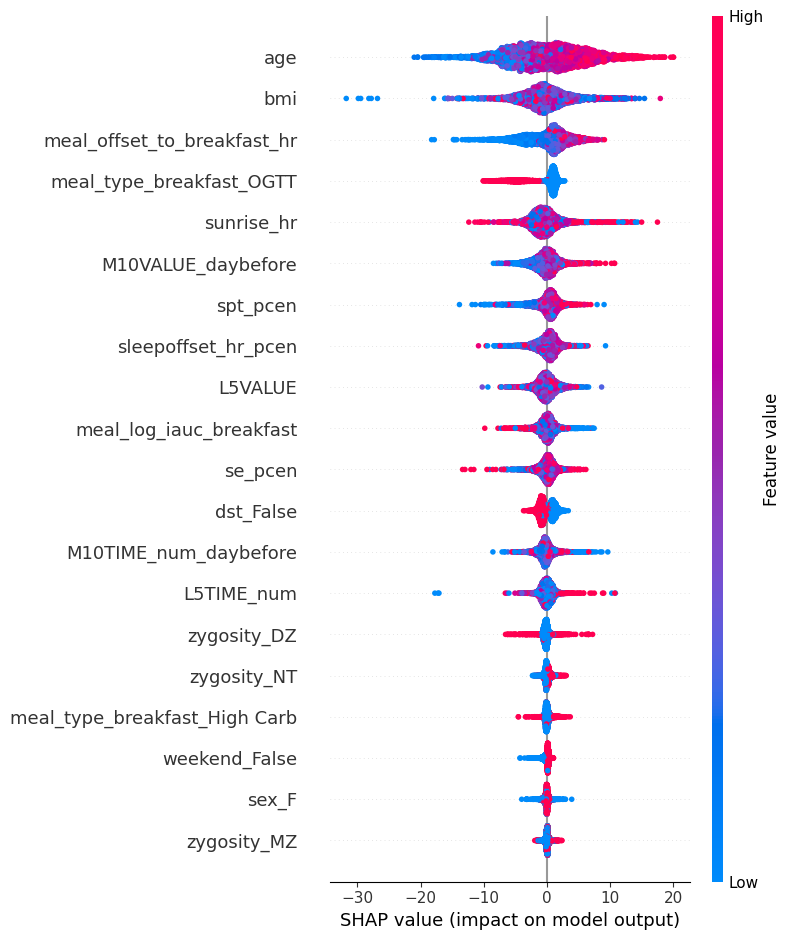

<Figure size 640x480 with 0 Axes>

In [101]:
shap.summary_plot(shap_values_1, X_train_normal)
plt.savefig("/content/drive/MyDrive/f53.png", dpi=600, bbox_inches="tight")
